# Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np

Load the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In the above cell we can see the first 5 and last 5 rows of our dataset. We see that in our dataset there are a total of 7043 rows and 21 columns present. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model. Also the problem statement says that we are suppose to predict the customer churn so it makes this to be a Classification problem!

# Check for Null Values

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
#Displaying column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#Display datatype of all features and target variable
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Using the describe method to check the numerical data details. There are only 3 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points showing no abnormality as such.

Here total charges is object datatype , so something is used as a string in Total charges column.
we will replace it with a null value and after that we will fill the null values with mean/mode.

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.loc[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observations , I saw the some columns have space as the value

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting the column type from object to float

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

Now I see total charges columns have some space values which I have replaced by nan values.

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

Now I will handle the null values

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The null values have been successfully removed.Now I will proceed to the data visualization part.

In [16]:
df.shape

(7043, 21)

The updated dataset consists of 7043 rows and 21 columns

In [17]:
#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

Now we will see visualizations of the dataset

First I will explore the categorical variables and make a count plot which gives the frequency of each column

In [19]:
categorical_variables = df.select_dtypes(include='object')
categorical_variables

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [20]:
categorical_variables.shape

(7043, 17)

In [21]:
categorical_variables.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
#Frequency values of each column in categorical variables
for col in categorical_variables:
    c = df[col].value_counts()
    print(c)
    print('--'*50)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
----------------------------------------------------------------------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------------------------------------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------------------------------------------------------------------------
No                  3390
Yes                 2971
No 

Checking the number of rows covered by all the unique values present in our object data type columns. It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to fix this before we proceed with any further analysis.

In [23]:
categorical_variables.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [24]:
categorical_variables.drop(['customerID'],axis=1,inplace=True)

In [25]:
categorical_variables.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


<AxesSubplot:xlabel='gender', ylabel='count'>

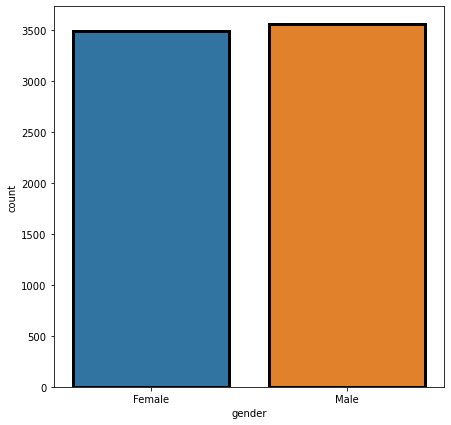

In [26]:
#Countplot

#Gender
plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['gender'],edgecolor='black',linewidth=3)

In the above count plot we can see that the total number of male and female gender is almost same still males being at a higher end than female covering the data points in our gender column.

<AxesSubplot:xlabel='Partner', ylabel='count'>

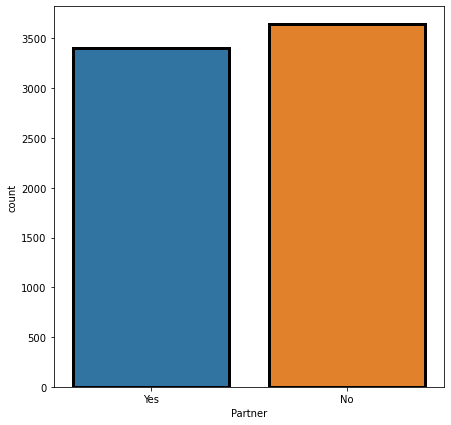

In [27]:
#Partner

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['Partner'],edgecolor='black',linewidth=3)

In the above count plot we can see that the partner details are almost similar indicating that people with no partner are a bit higher than people who have partners.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

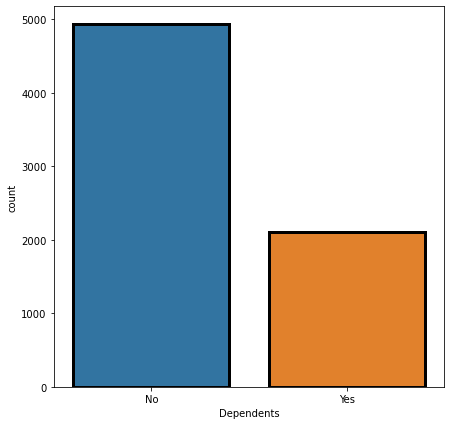

In [28]:
#Dependents

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['Dependents'],edgecolor='black',linewidth=3)

In the above count plot we can see that the partner details are almost similar indicating that people with no partner are a bit higher than people who have partners.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

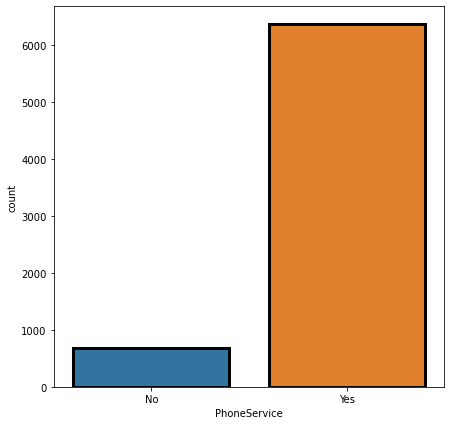

In [29]:
#Phone Service

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['PhoneService'],edgecolor='black',linewidth=3)

In the above count plot we can see that people with a phone service cover a large data chunk while there are only few people who do not own a phone service.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

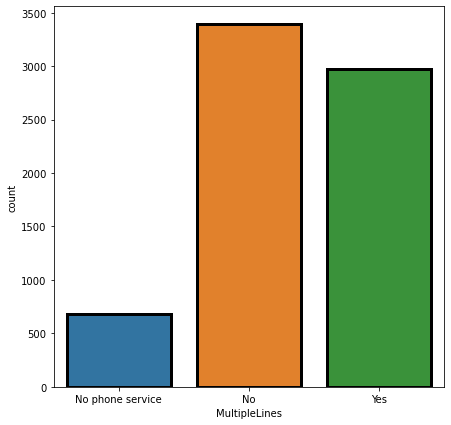

In [30]:
#Multiple Lines

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['MultipleLines'],edgecolor='black',linewidth=3)

In the above count plot we can see that people with single line are higher in number than people who have multiple lines but we also see a minority of people who do not own a phone service yet.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

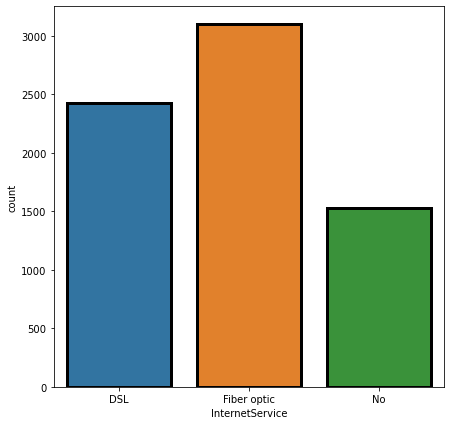

In [31]:
#Internet Service

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['InternetService'],edgecolor='black',linewidth=3)

In the above count plot we can see that majority of people have chosen to get a high speed fibre optic internet but there are many people who do not own an internet service at all

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

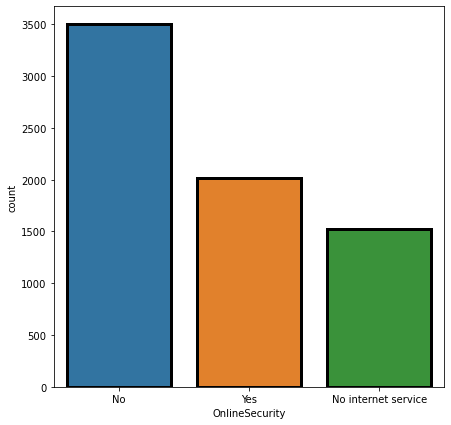

In [32]:
#Online Security

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['OnlineSecurity'],edgecolor='black',linewidth=3)

In the above count plot we can see that people who do not have any internet service obviously do not need any online security either but there is a huge number in people who own an internet service but do not use any online security yet.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

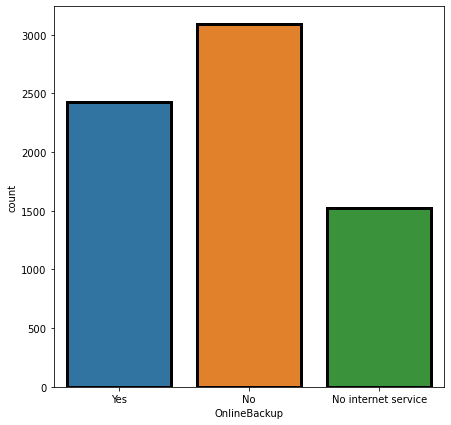

In [33]:
#Online Backup

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['OnlineBackup'],edgecolor='black',linewidth=3)

In the above count plot we can see that just like people with no internet service and online security the same chunk of folks have no online backup usage either. But the difference between people who use internet and do not have online backup vs people who use online back up is relatively lesser as compared to online security details.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

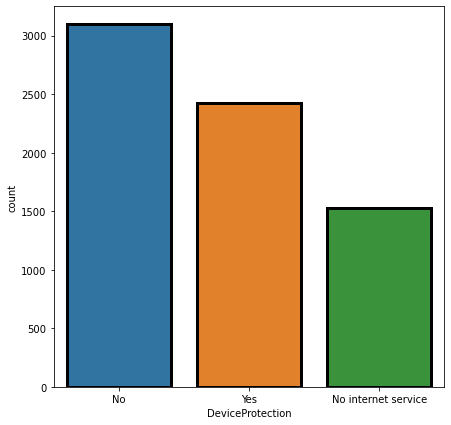

In [34]:
#Device protection

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['DeviceProtection'],edgecolor='black',linewidth=3)

In the above count plot we can see that people without any device protection is higher in number as compared to people who have some kind of device protection.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

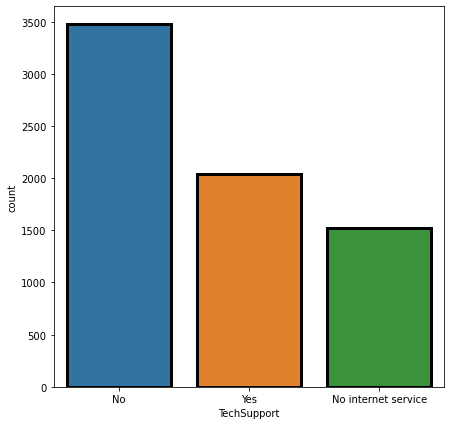

In [35]:
#Tech Support

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['TechSupport'],edgecolor='black',linewidth=3)

In the above count plot we can see that people who do not need technical support is higher in number as compared to people who need technical assistance.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

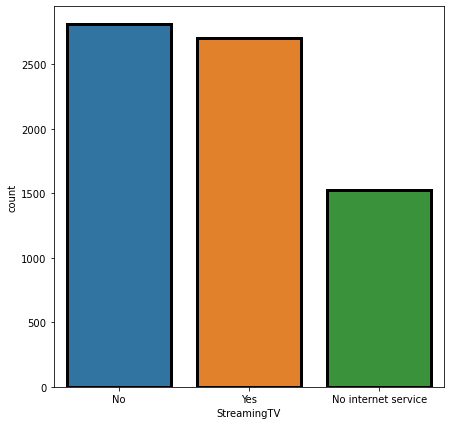

In [36]:
#Streaming TV

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['StreamingTV'],edgecolor='black',linewidth=3)

In the above count plot we can see that people who do not use streaming TV service is slightly higher than the people who do use streaming TV service.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

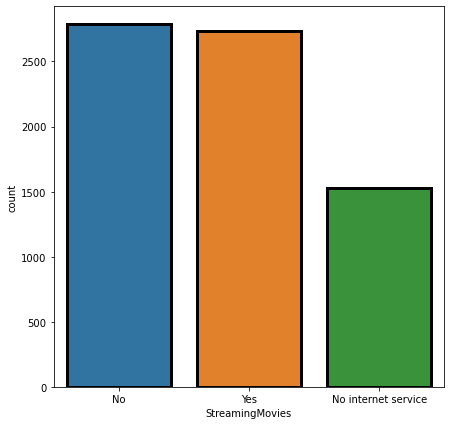

In [37]:
#Streaming Movies

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['StreamingMovies'],edgecolor='black',linewidth=3)

In the above count plot we can see that just like streaming TV service there are people who do not stream movies a slight higher than people who do enjoy streaming movies online.

<AxesSubplot:xlabel='Contract', ylabel='count'>

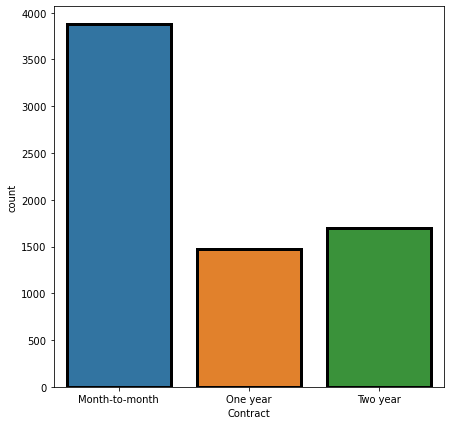

In [38]:
#Contract

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['Contract'],edgecolor='black',linewidth=3)

In the above count plot we can see that there are a lot of people who prefer the month to month contract over the 1 year or 2 year contract term.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

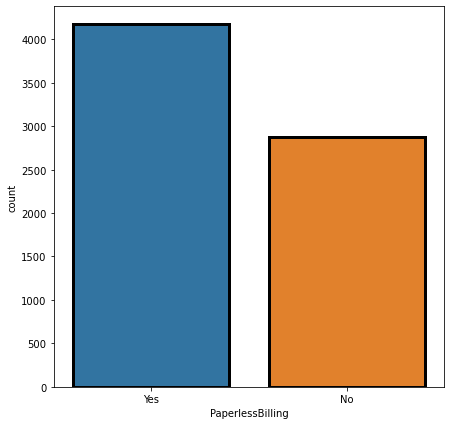

In [39]:
#Paperless Billing

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['PaperlessBilling'],edgecolor='black',linewidth=3)

In the above count plot we can see that the preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option fall in a similar range of numbers

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

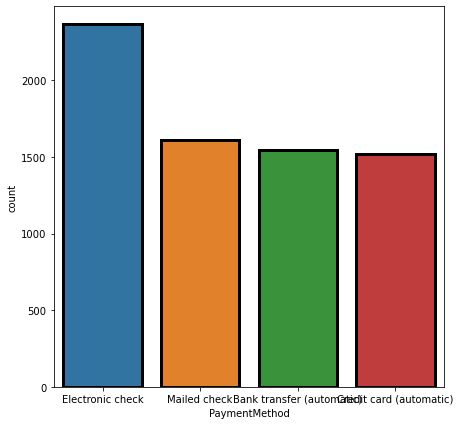

In [40]:
#Payment Method

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['PaymentMethod'],edgecolor='black',linewidth=3)

In the above count plot we can see that the preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option fall in a similar range of numbers

<AxesSubplot:xlabel='Churn', ylabel='count'>

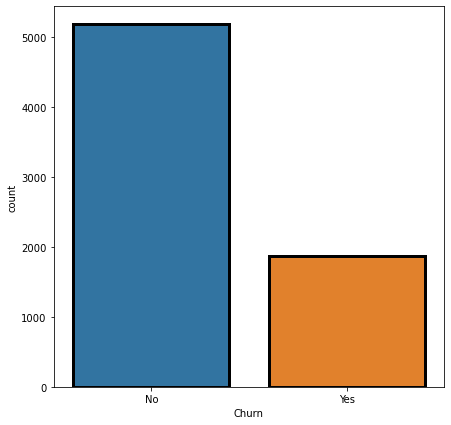

In [41]:
#Churn

plt.figure(figsize=(7,7))
sns.countplot(categorical_variables['Churn'],edgecolor='black',linewidth=3)

In the above count plot we can see that "No Churn" values are way higher than "Yes Churn" data. Since this is our target label it indicates an imbalanced data which will need to be rectified later on.

Now I will explore the numerical variables using distplot which checks the density of the plot

In [42]:
numerical_variables = df.select_dtypes(include='number')
numerical_variables.shape

(7043, 4)

DistPlot

In [43]:
numerical_variables.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

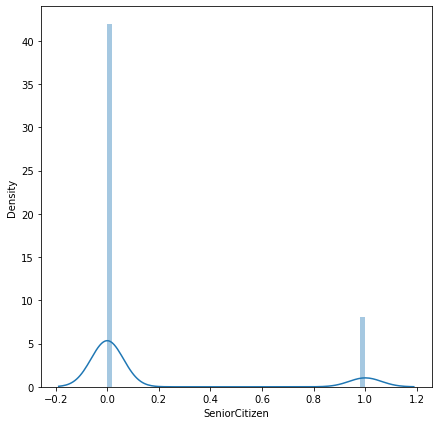

In [44]:
#Senior Citizen

plt.figure(figsize=(7,7))
sns.distplot(numerical_variables['SeniorCitizen'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

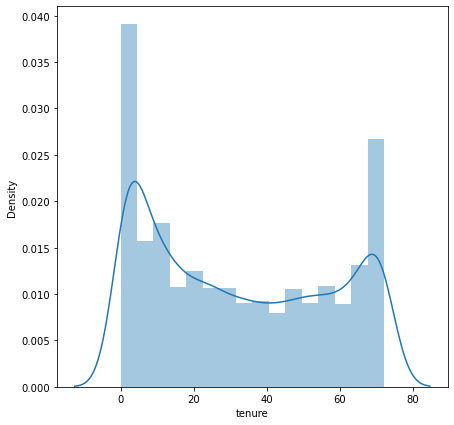

In [45]:
#tenure

plt.figure(figsize=(7,7))
sns.distplot(numerical_variables['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

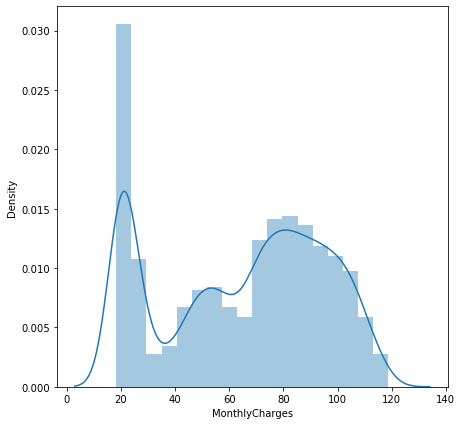

In [46]:
#Monthly Charges

plt.figure(figsize=(7,7))
sns.distplot(numerical_variables['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

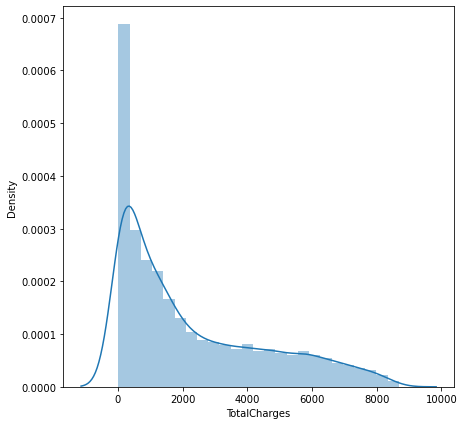

In [47]:
#Total Charges 

plt.figure(figsize=(7,7))
sns.distplot(numerical_variables['TotalCharges'])

2]Histogram

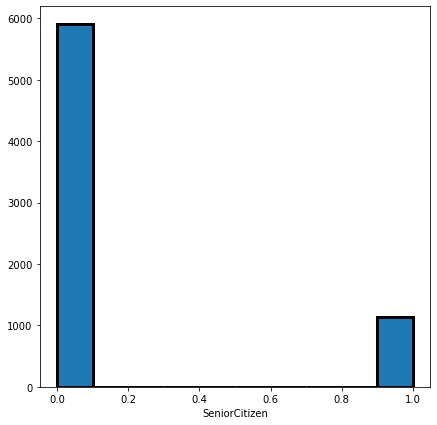

In [48]:
#Senior Citizen

plt.figure(figsize=(7,7))
plt.hist(numerical_variables['SeniorCitizen'],edgecolor='black',linewidth=3)
plt.xlabel('SeniorCitizen')
plt.show()

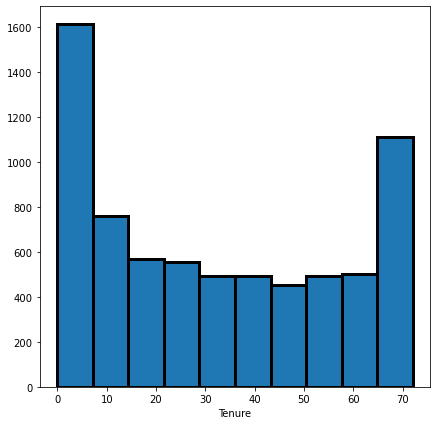

In [49]:
#Tenure

plt.figure(figsize=(7,7))
plt.hist(numerical_variables['tenure'],edgecolor='black',linewidth=3)
plt.xlabel('Tenure')
plt.show()

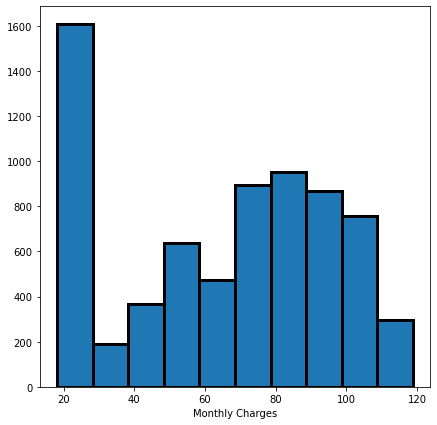

In [50]:
#Monthly Charges

plt.figure(figsize=(7,7))
plt.hist(numerical_variables['MonthlyCharges'],edgecolor='black',linewidth=3)
plt.xlabel('Monthly Charges')
plt.show()

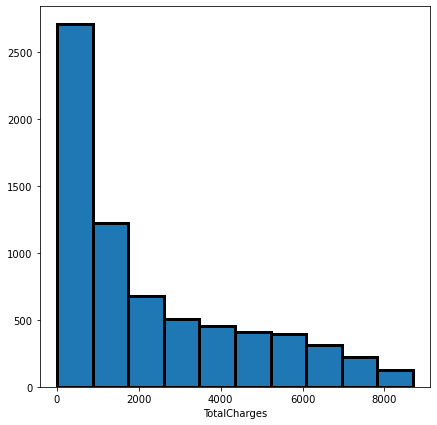

In [51]:
#Total Charges

plt.figure(figsize=(7,7))
plt.hist(numerical_variables['TotalCharges'],edgecolor='black',linewidth=3)
plt.xlabel('TotalCharges')
plt.show()

Now I have completed the univariate Analysis part

# Bivariate Analysis

Our target variable is Churn

Using Bar plot , I will make analysis on the features with the help of target variable

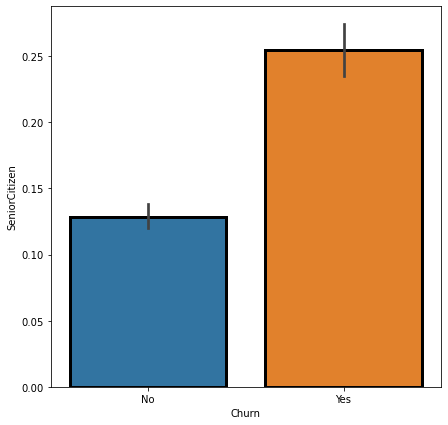

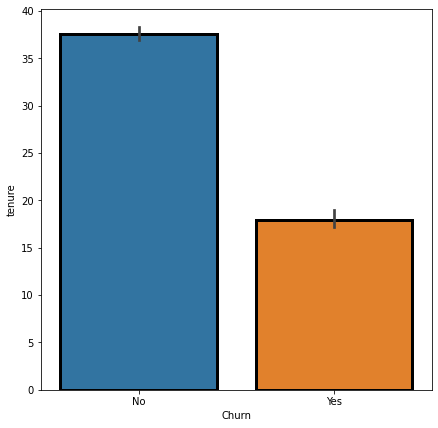

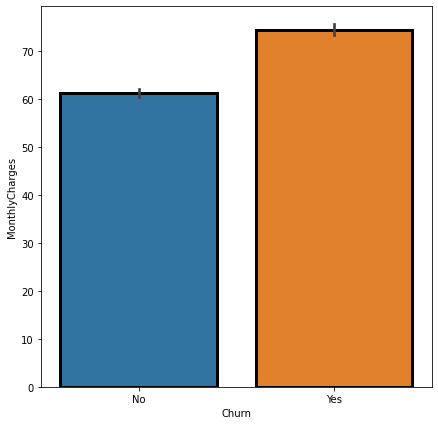

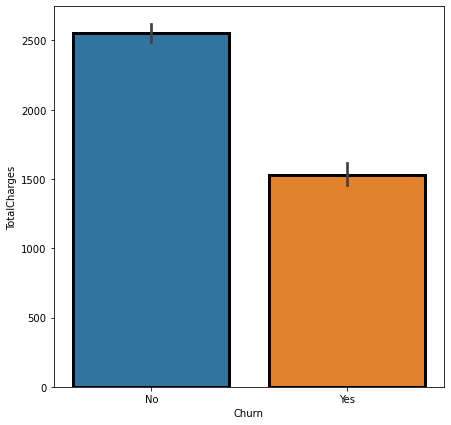

In [52]:
for i in numerical_variables:
    plt.figure(figsize=(7,7))
    sns.barplot(df['Churn'],df[i],edgecolor='black',linewidth=3)

Using barplot ,I will analysis for categorical variables with features with hue being 'Churn' column

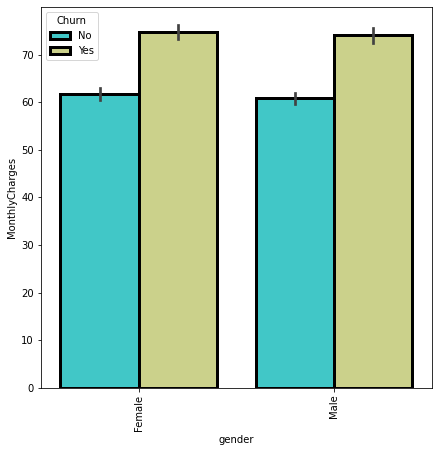

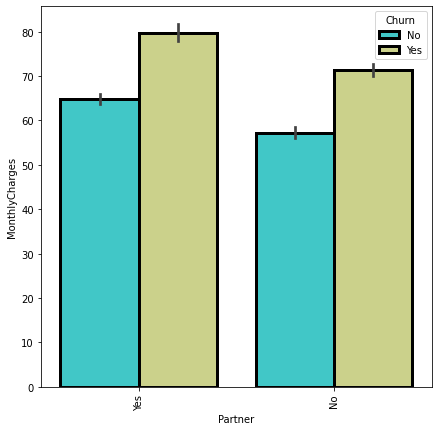

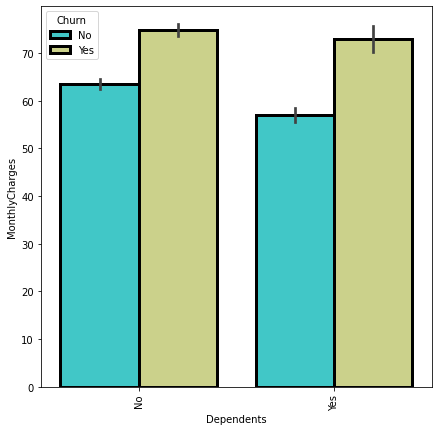

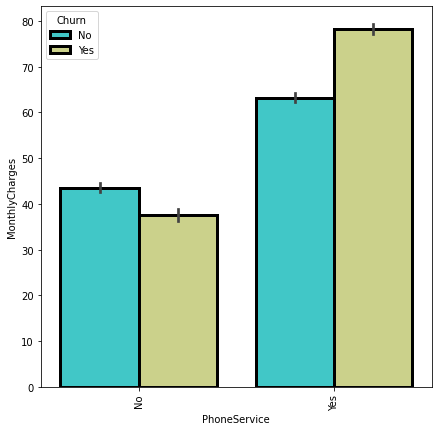

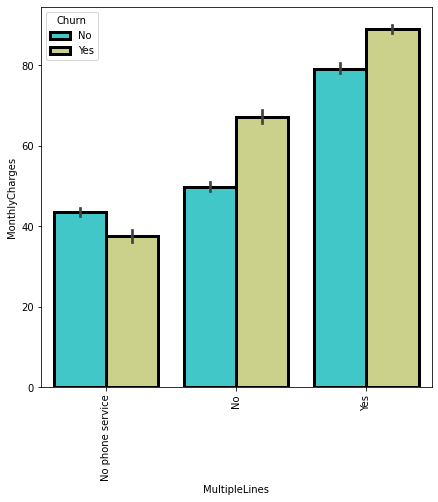

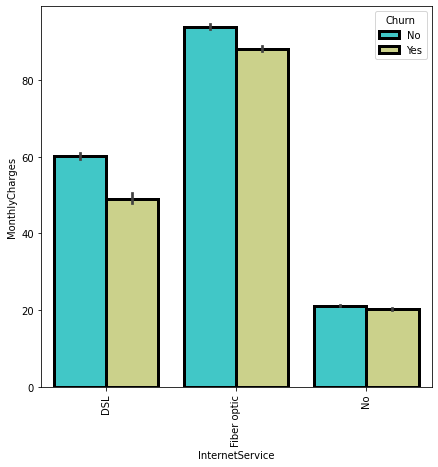

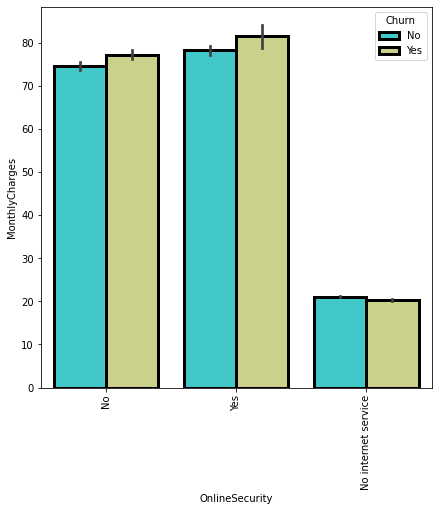

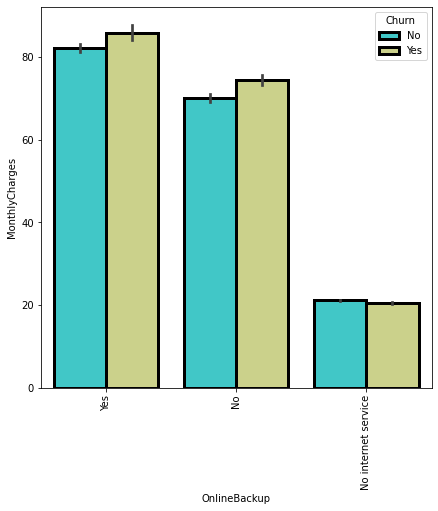

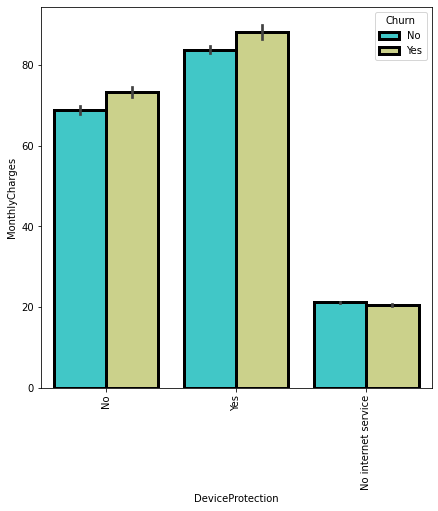

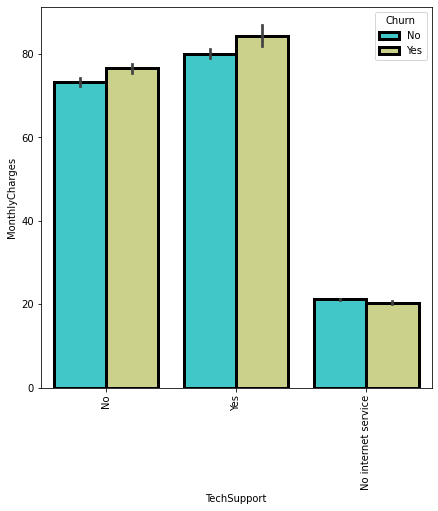

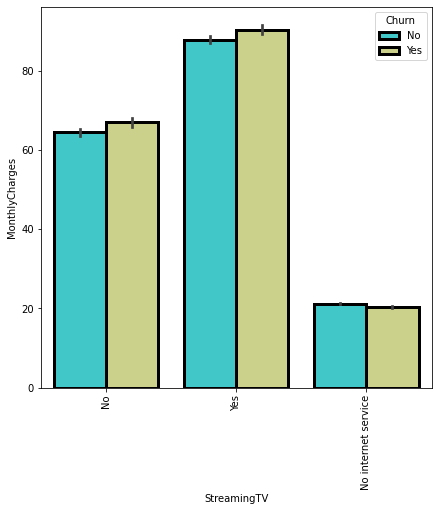

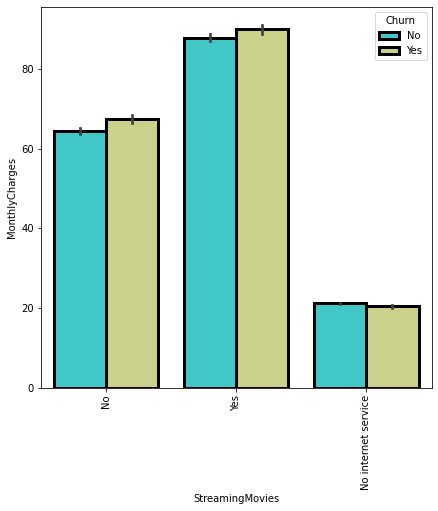

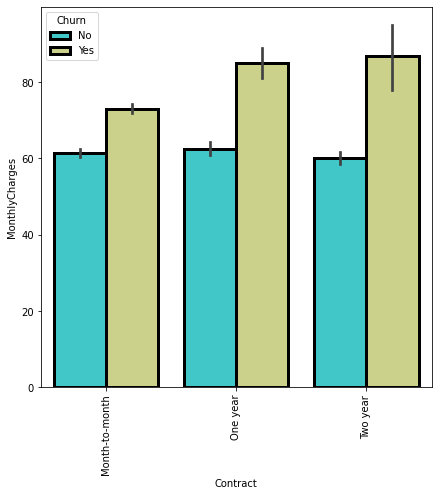

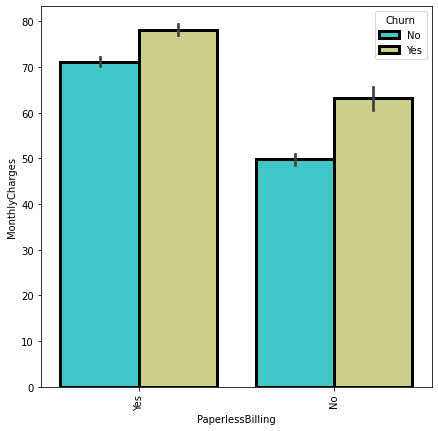

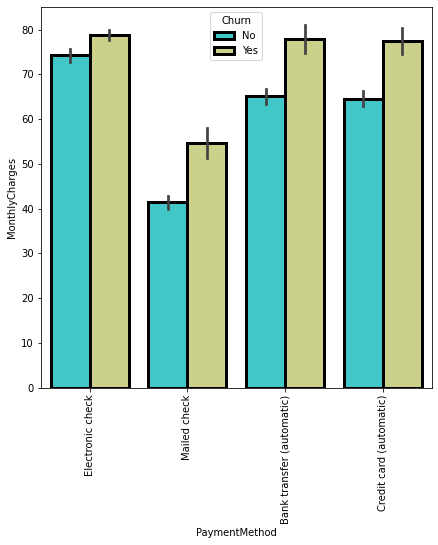

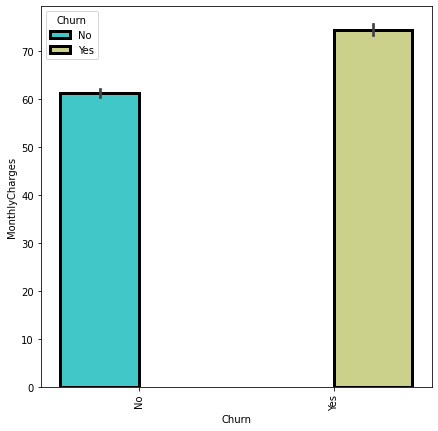

In [53]:
#MonthlyCharges vs Categorical Variables
for i in categorical_variables:
    plt.figure(figsize=(7,7))
    sns.barplot(df[i],df['MonthlyCharges'],hue=df['Churn'],edgecolor='black',linewidth=3,palette='rainbow')
    plt.xticks(rotation=90)

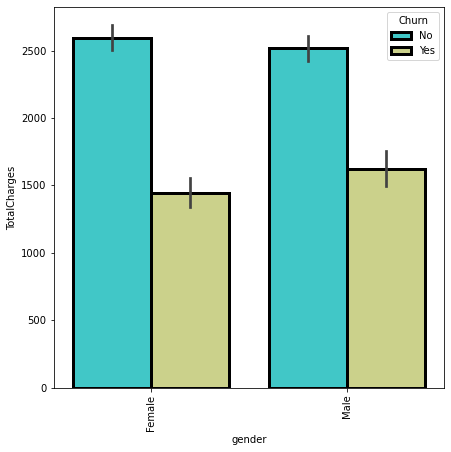

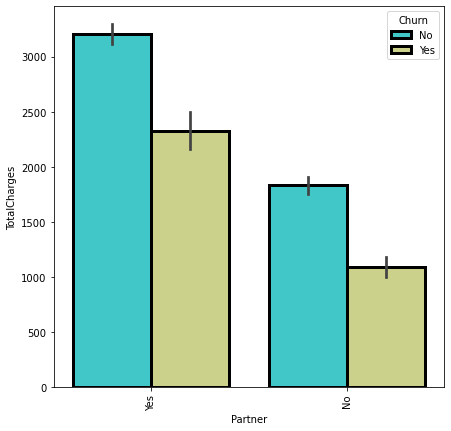

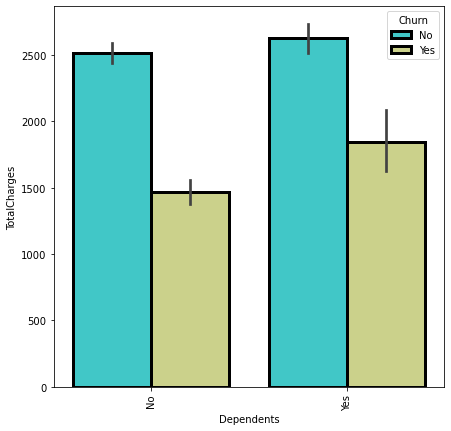

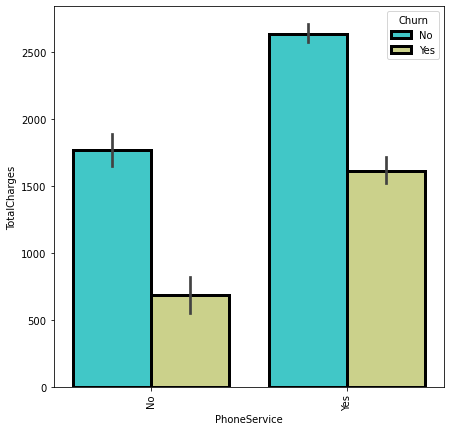

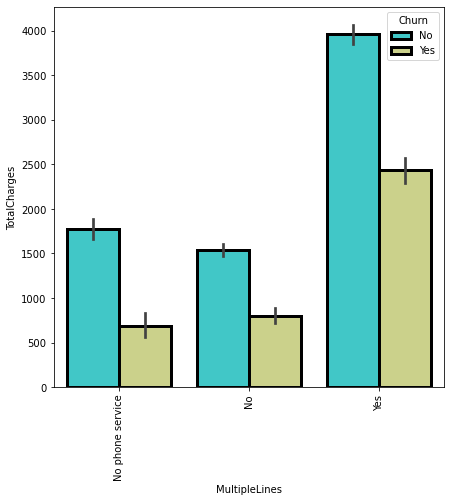

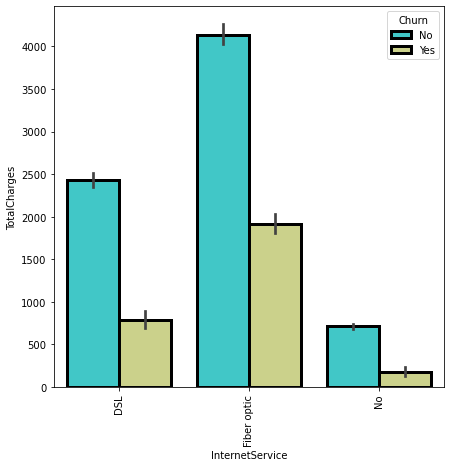

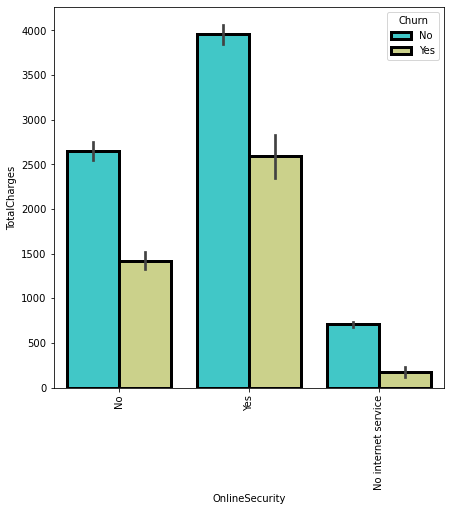

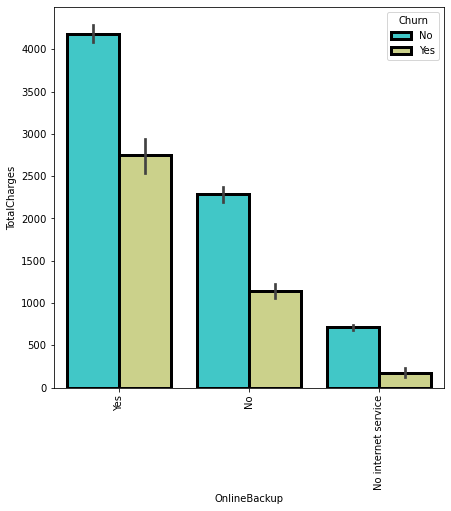

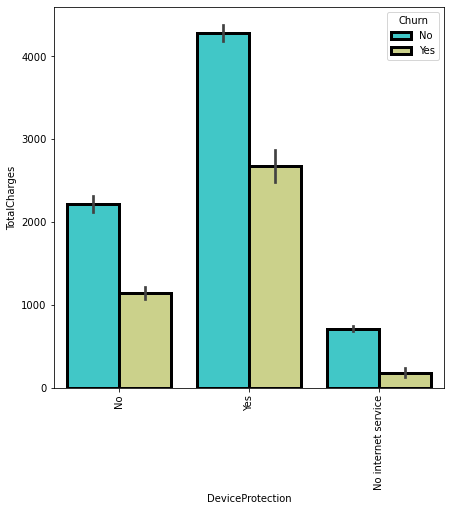

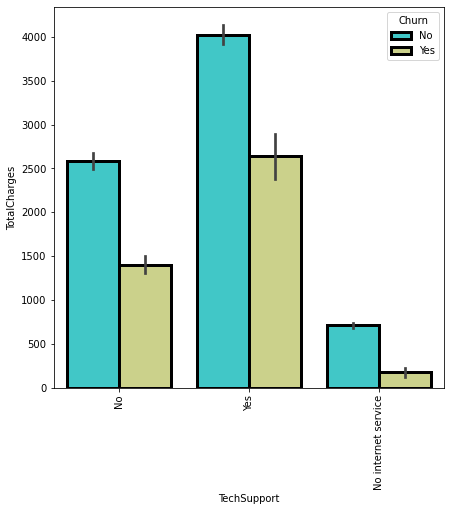

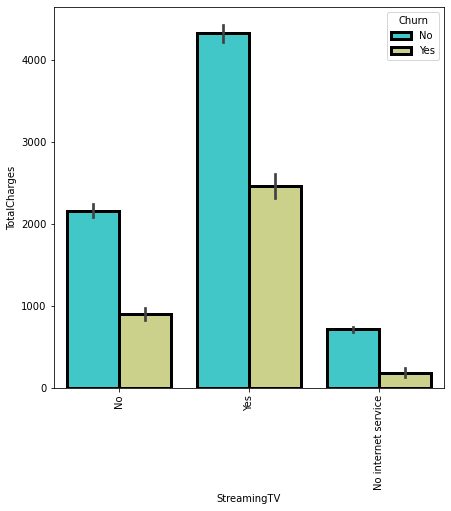

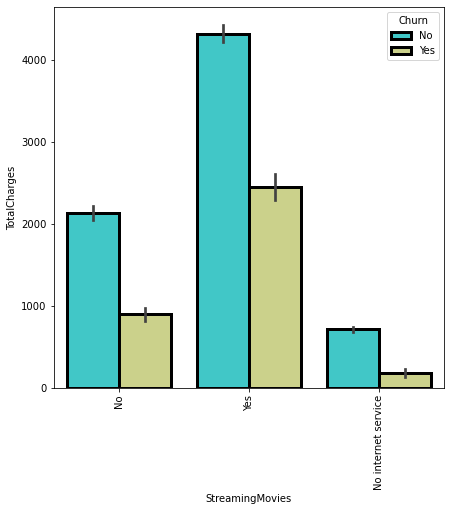

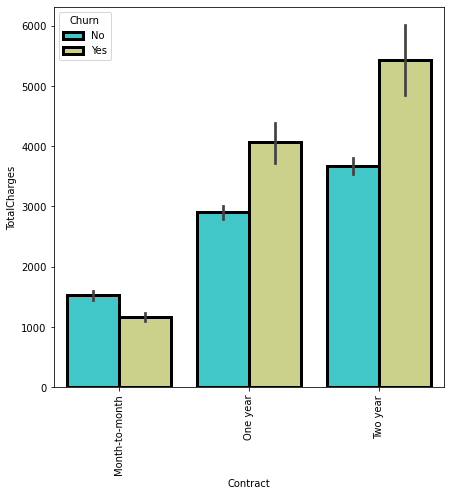

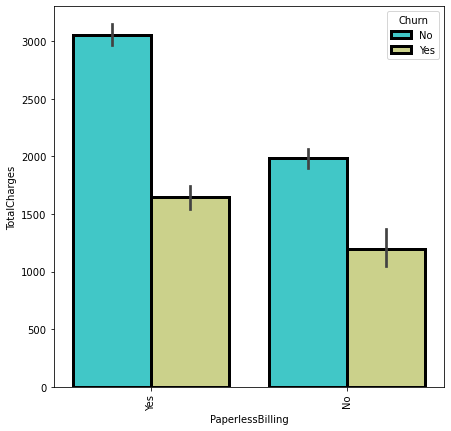

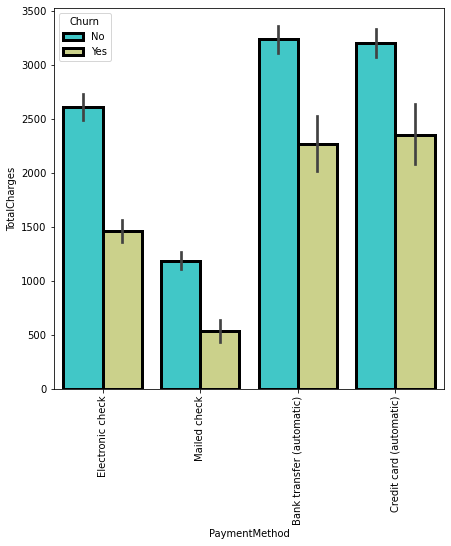

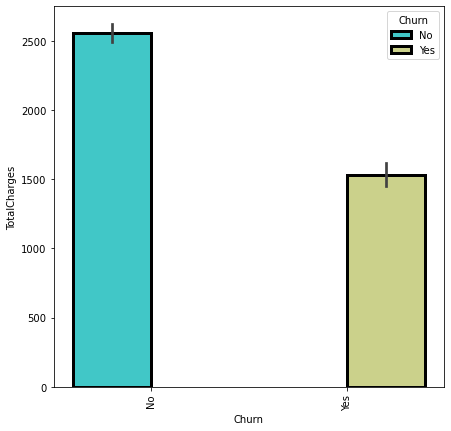

In [54]:
#Total Charges vs Categorical Variables
for i in categorical_variables:
    plt.figure(figsize=(7,7))
    sns.barplot(df[i],df['TotalCharges'],hue=df['Churn'],edgecolor='black',linewidth=3,palette='rainbow')
    plt.xticks(rotation=90)

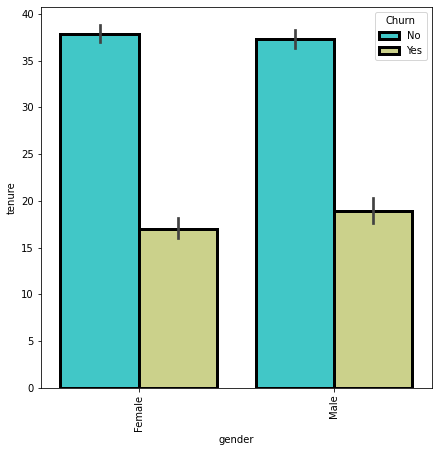

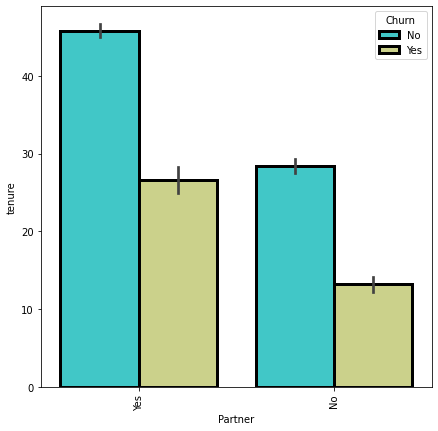

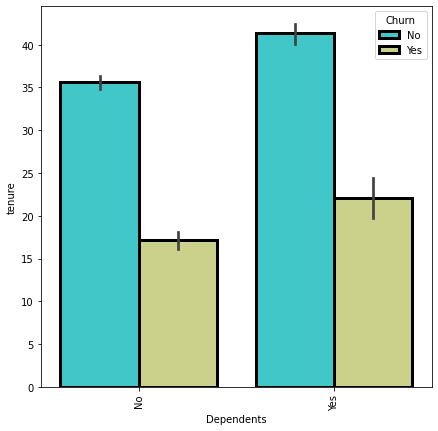

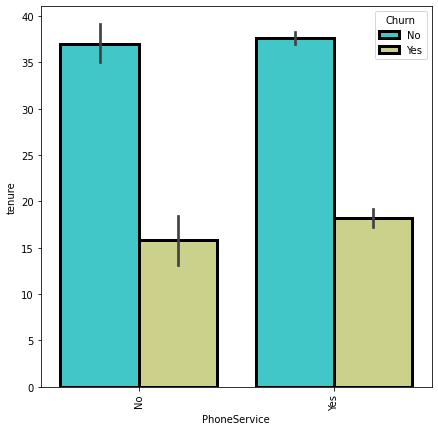

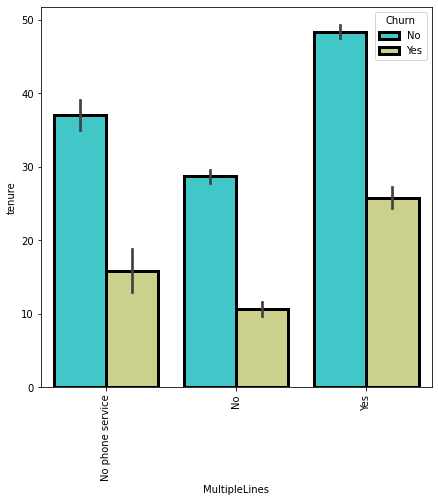

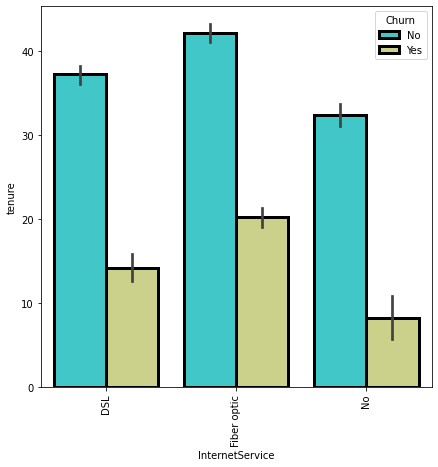

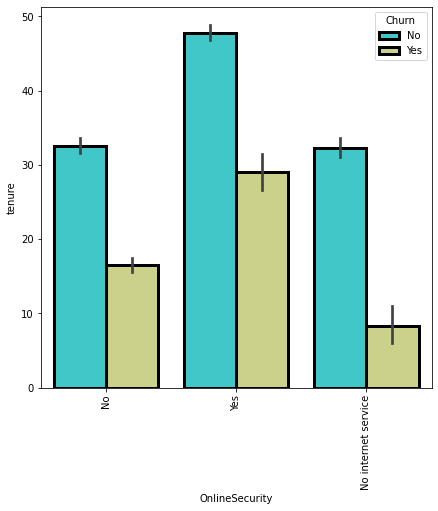

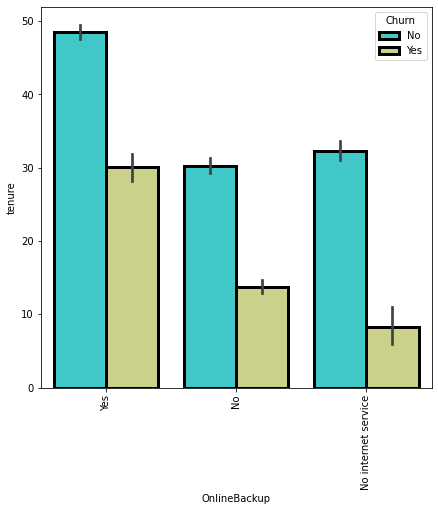

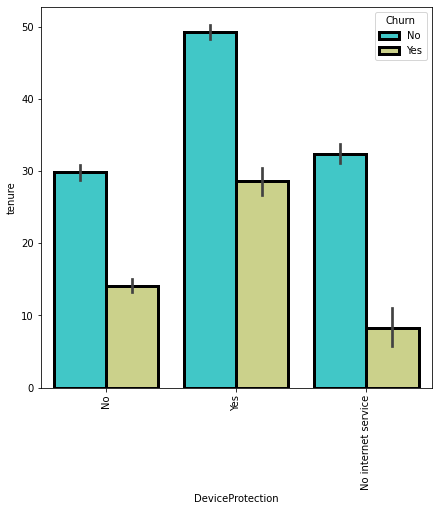

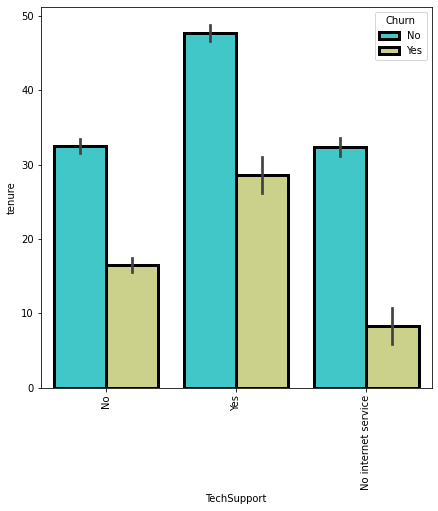

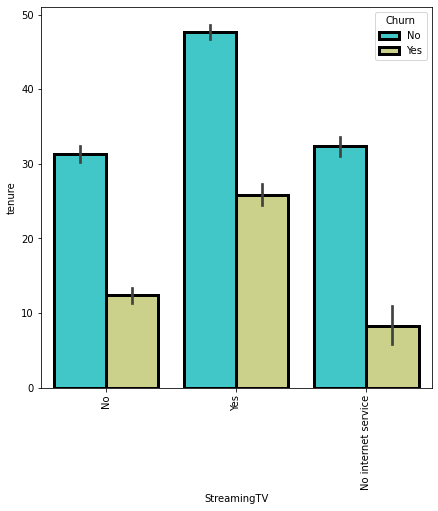

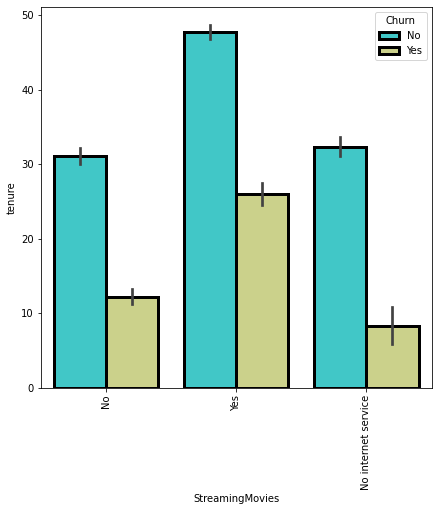

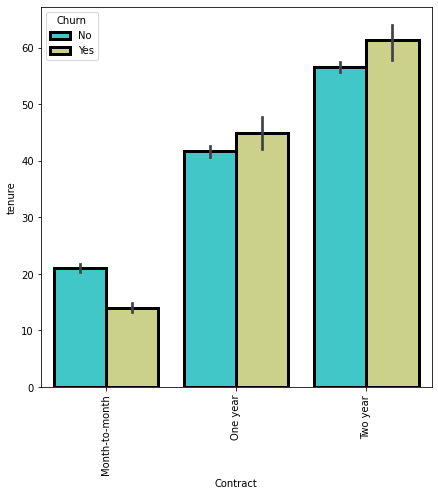

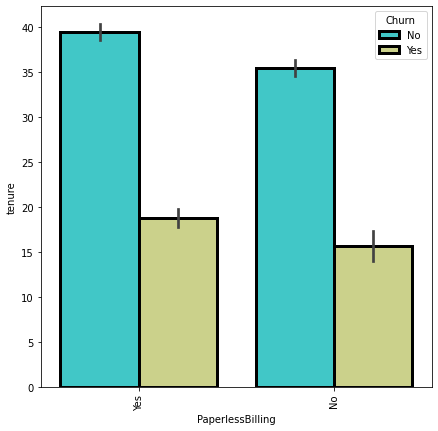

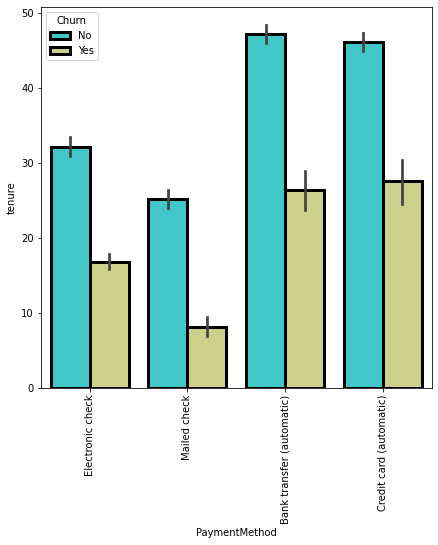

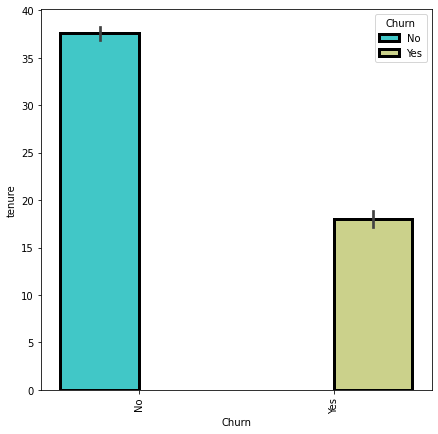

In [55]:
#Tenure vs Categorical Variables
for i in categorical_variables:
    plt.figure(figsize=(7,7))
    sns.barplot(df[i],df['tenure'],hue=df['Churn'],edgecolor='black',linewidth=3,palette='rainbow')
    plt.xticks(rotation=90)

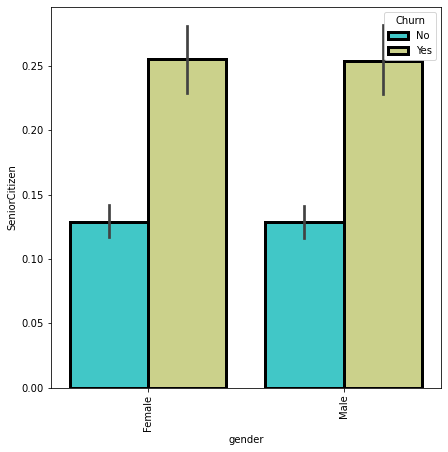

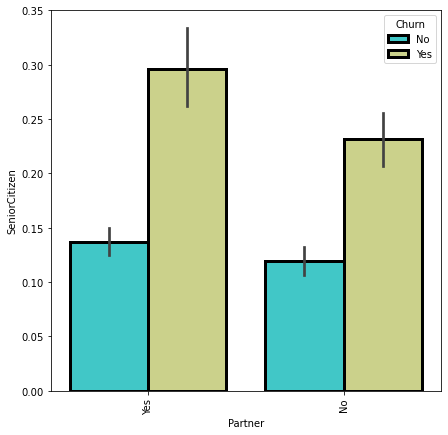

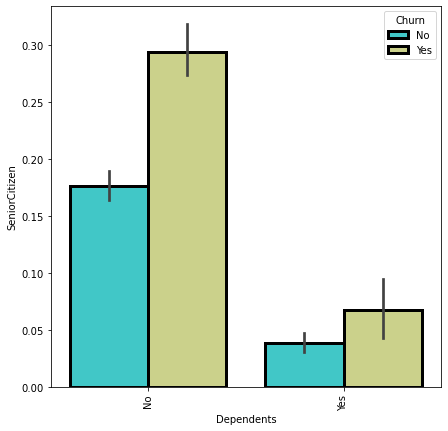

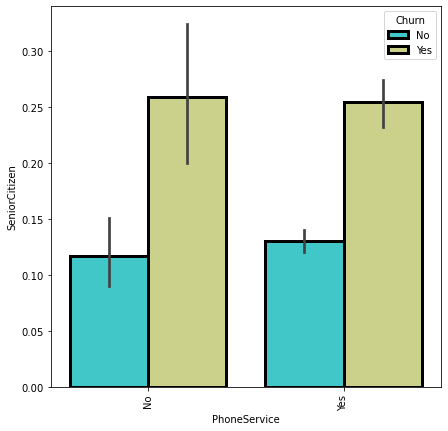

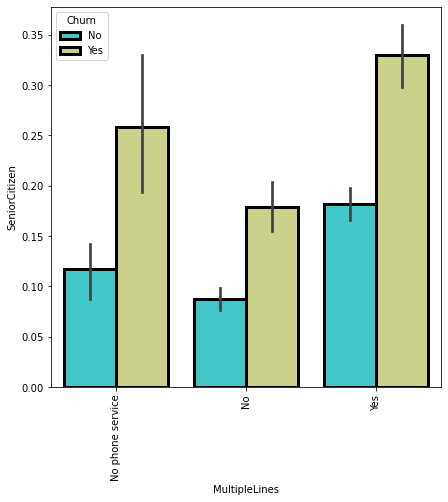

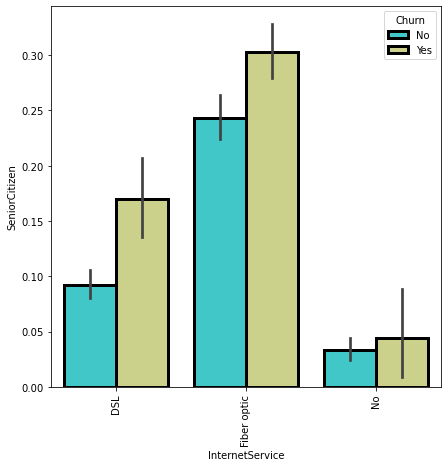

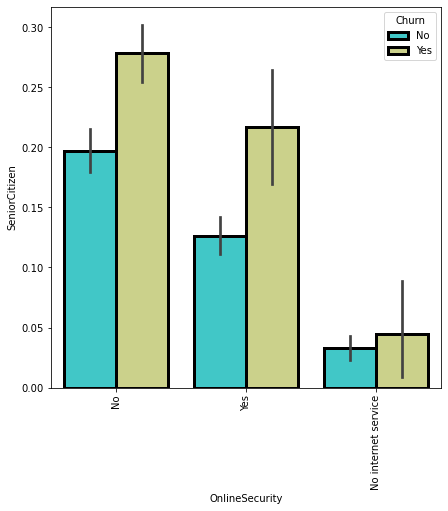

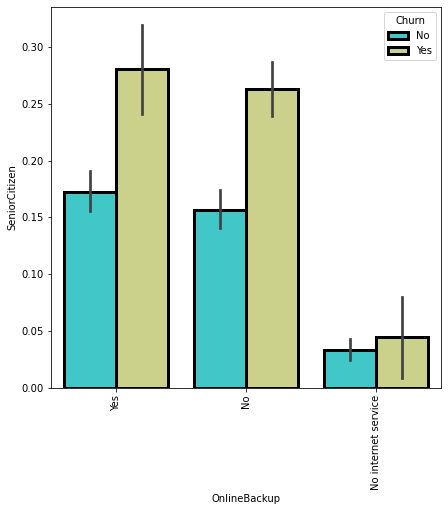

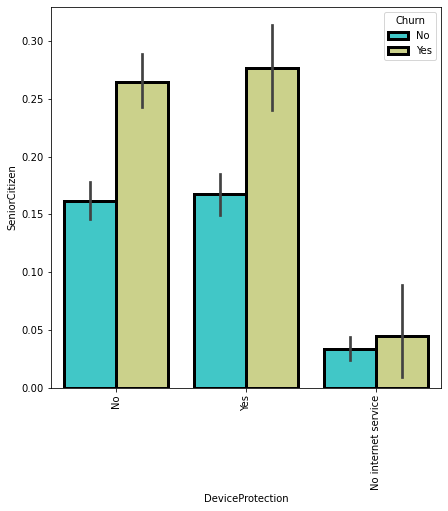

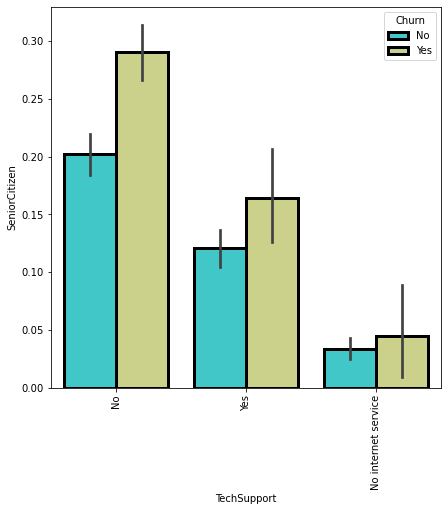

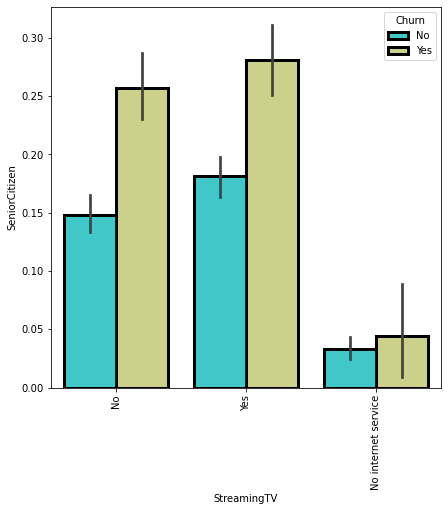

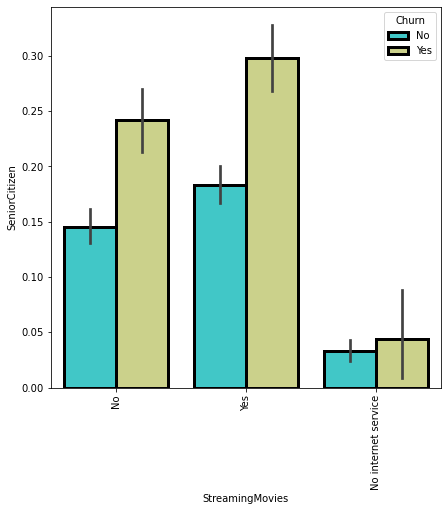

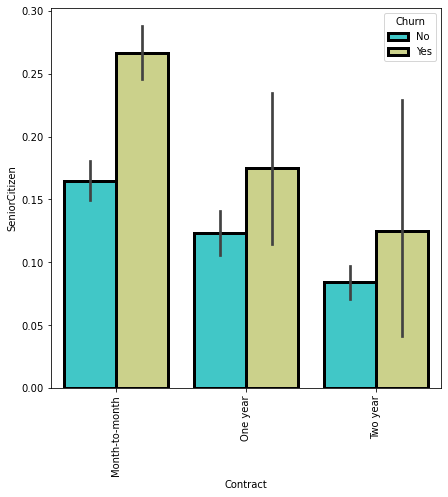

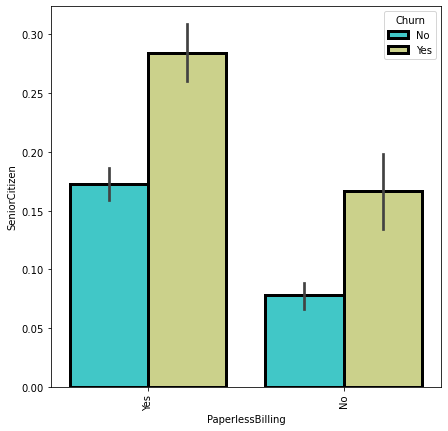

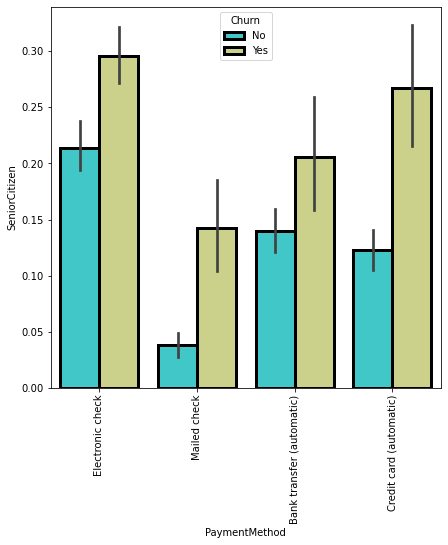

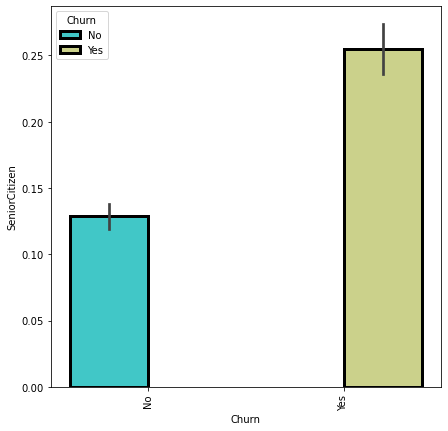

In [56]:
#Senior Citizen vs Categorical Variables
for i in categorical_variables:
    plt.figure(figsize=(7,7))
    sns.barplot(df[i],df['SeniorCitizen'],hue=df['Churn'],edgecolor='black',linewidth=3,palette='rainbow')
    plt.xticks(rotation=90)

With the help of above bar plot we can identify the No churn and Yes churn data and understand that the "Yes Churn" option has been significantly lower than it counterpart. However area where it is higher are the pain points that will need to be resolved so that we can continue to retain our customer base.

Now I will explore with Strip plot 

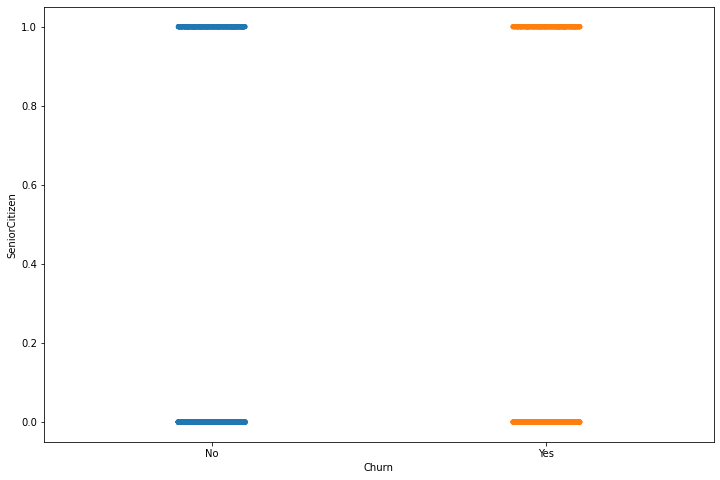

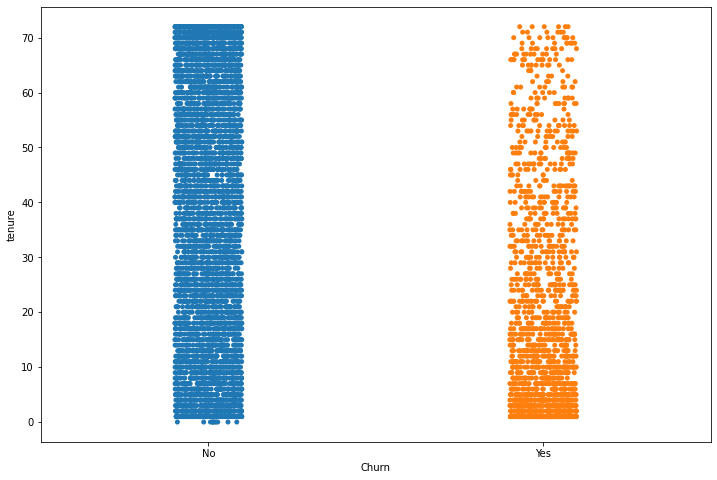

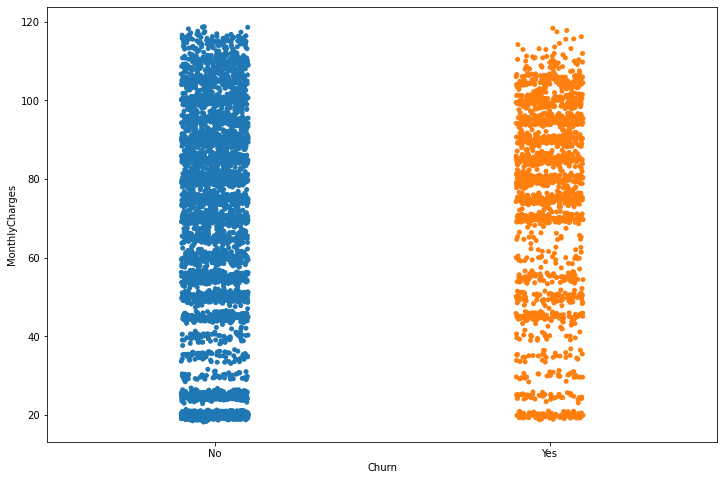

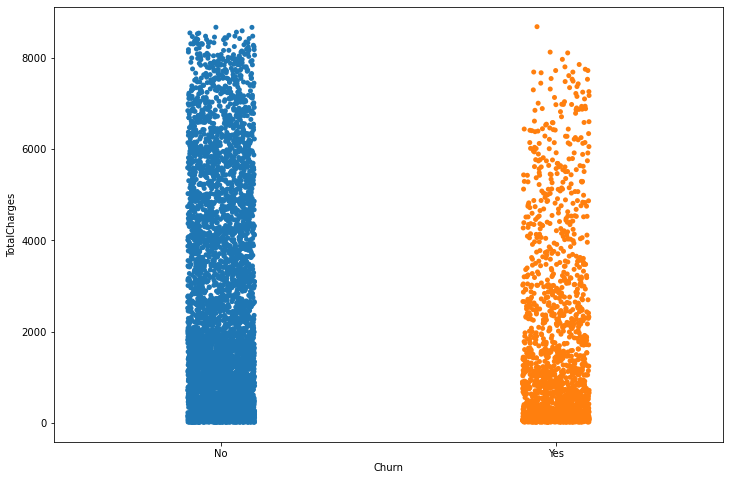

In [59]:
for i in numerical_variables:
    plt.figure(figsize=(12,8))
    sns.stripplot(df['Churn'],df[i])

Now I have also completed the bivariate analysis part.I will proceed to Encoding Technique

# Encoding 

In [60]:
categorical_variables.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [61]:
 from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()
le

LabelEncoder()

I have used LabelEncoder to convert the object data type into a numerical format.

In [63]:
for feature in categorical_variables:
    df[feature] = le.fit_transform(df[feature])
    df[feature]

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [65]:
#Dropping CustomerID 
df.drop(['customerID'],axis=1,inplace=True)

In [66]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

# CORRELATION MATRIX

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [67]:
df_corr = df.corr()
df_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

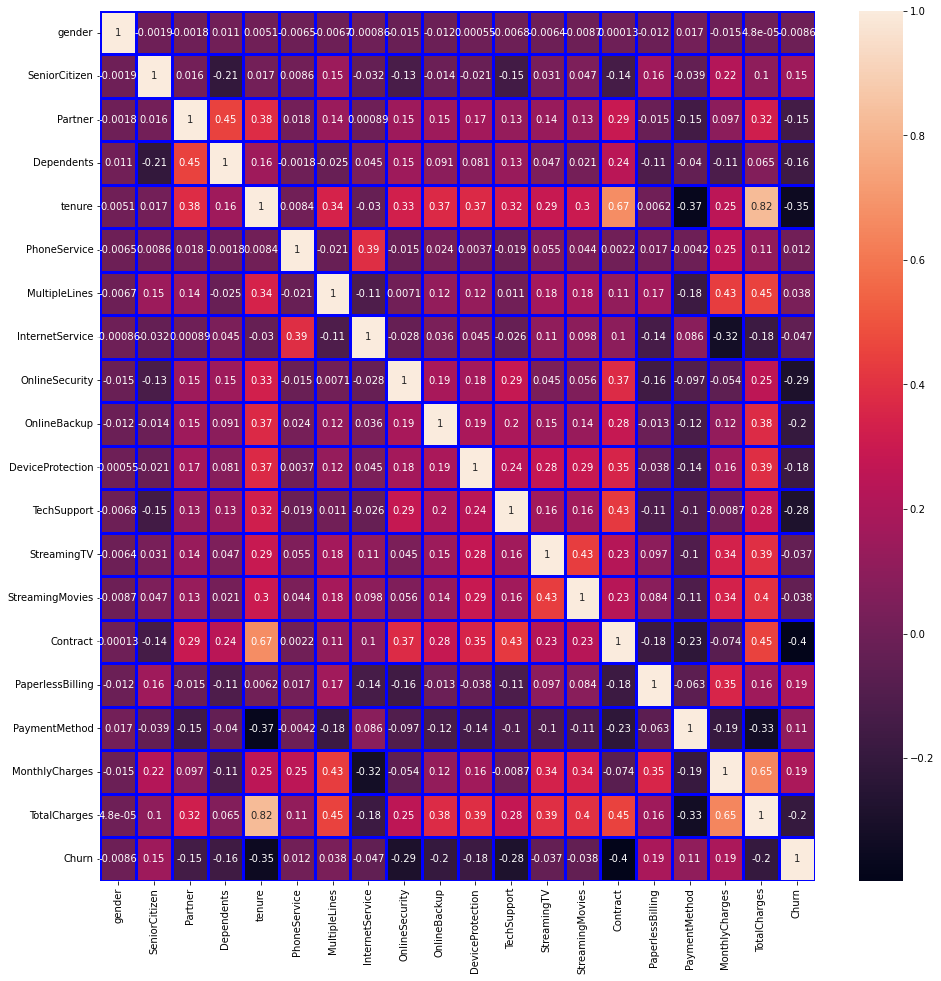

In [81]:
plt.figure(figsize=(16,16))
sns.heatmap(df_corr,annot=True,linecolor='blue',linewidths=3)

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.

Comparing Feature Variables with Target variable

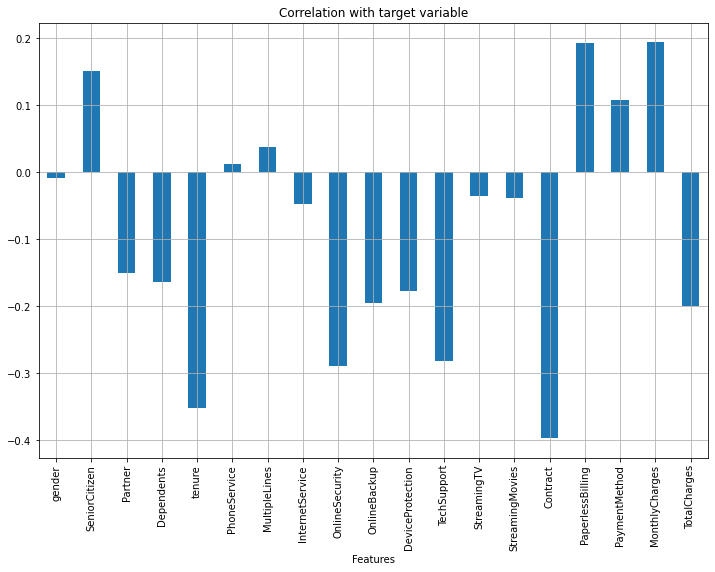

In [72]:
plt.figure(figsize=(12,8))
df.drop('Churn',axis=1).corrwith(df['Churn']).plot(kind='bar',grid=True)
plt.title('Correlation with target variable');
plt.xlabel("Features");

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that columns monthly charges, paperless billing, senior citizen, payment method, multiple lines and phone service are positively correlated with our target label churn while all the remaining features are negatively correlated with our label column.

# Checking For skewness

In [73]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Outliers

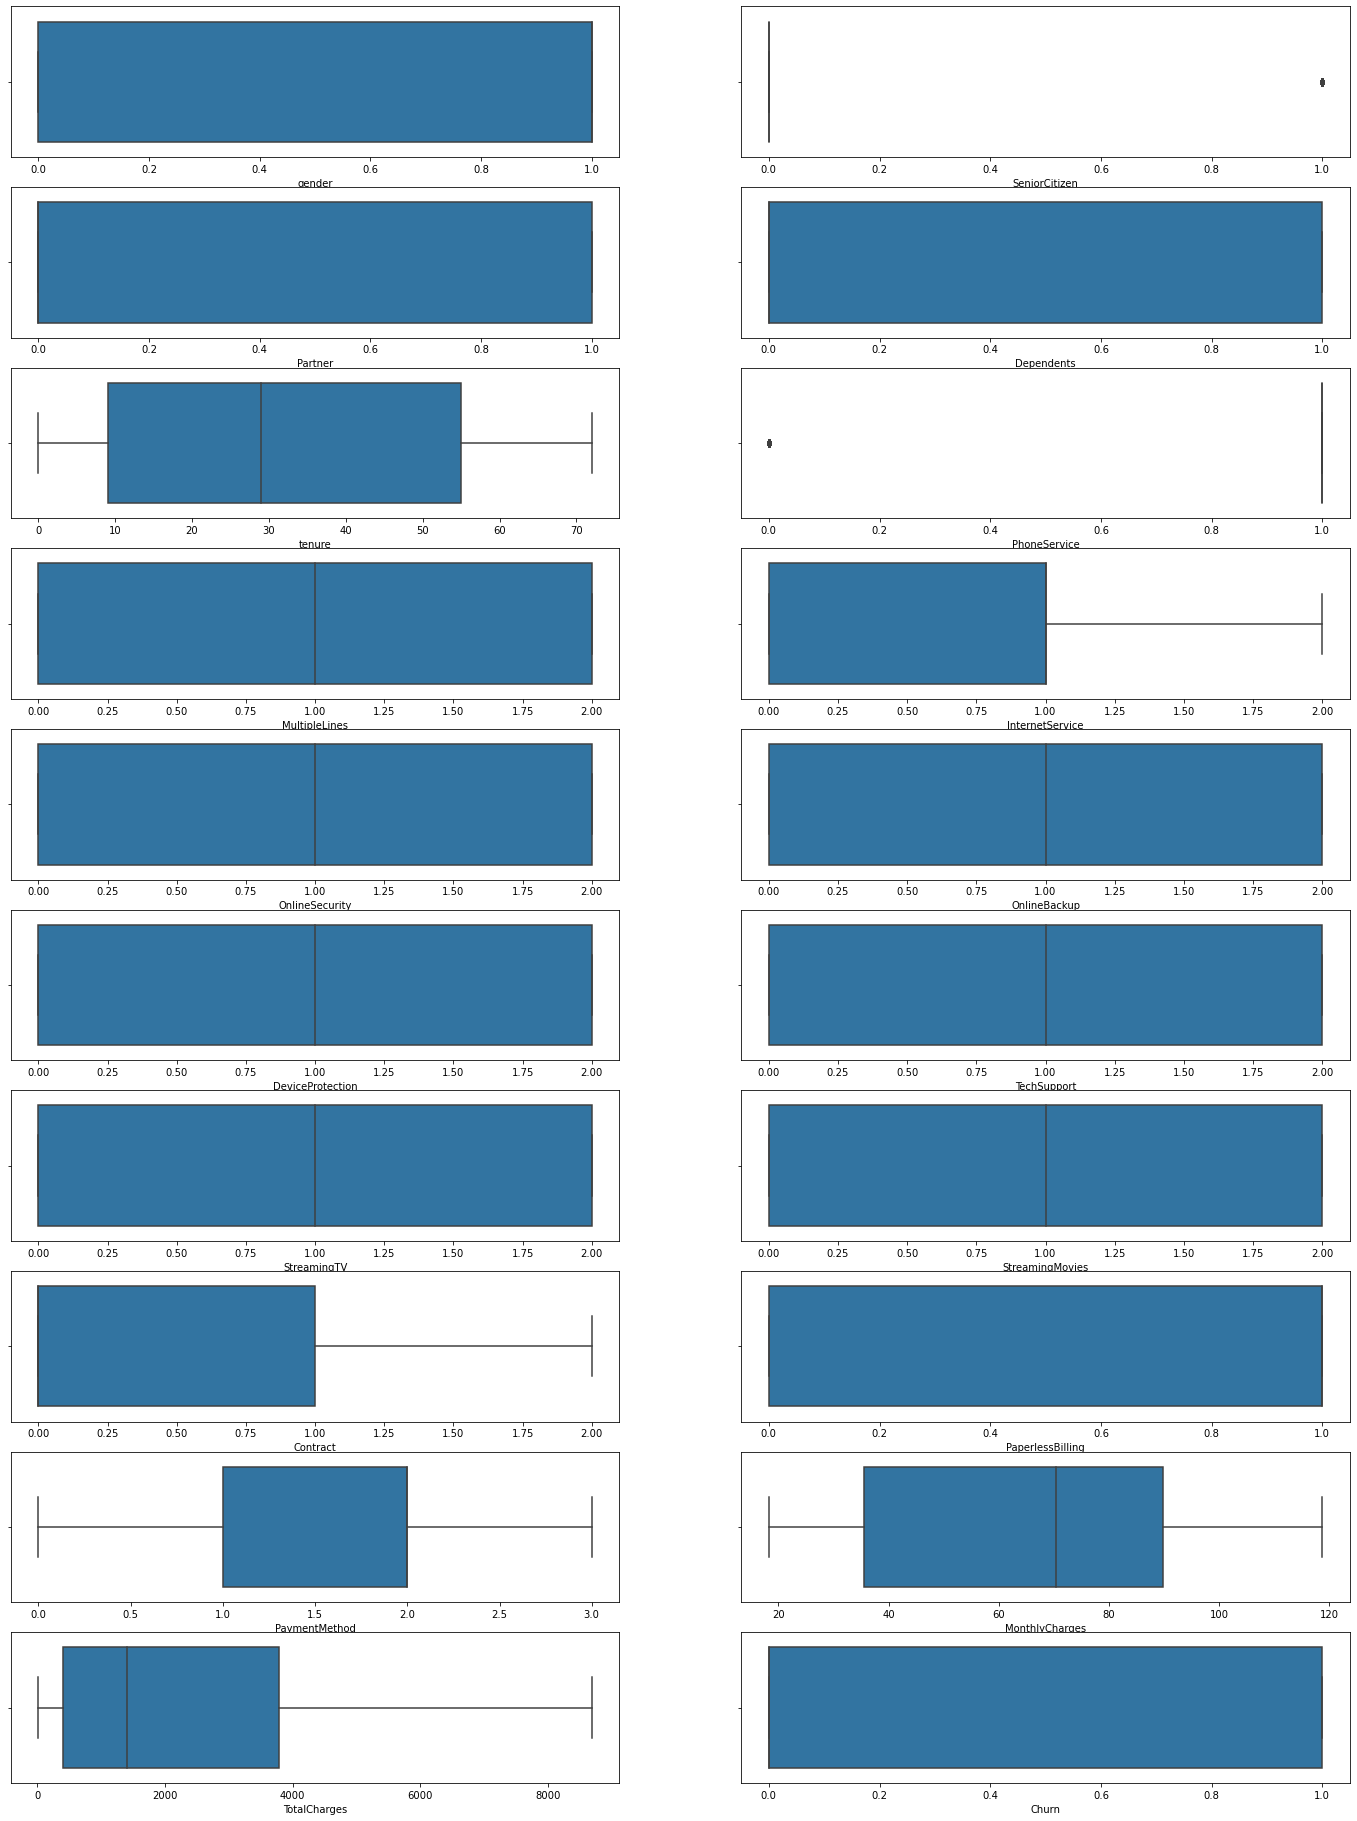

In [79]:
#Outlier Checking 
plt.figure(figsize=(24,36),facecolor='white')
plotno = 1
for i in df:
    if plotno <= 22:
        ax = plt.subplot(11,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

There are no outliers present in the dataset

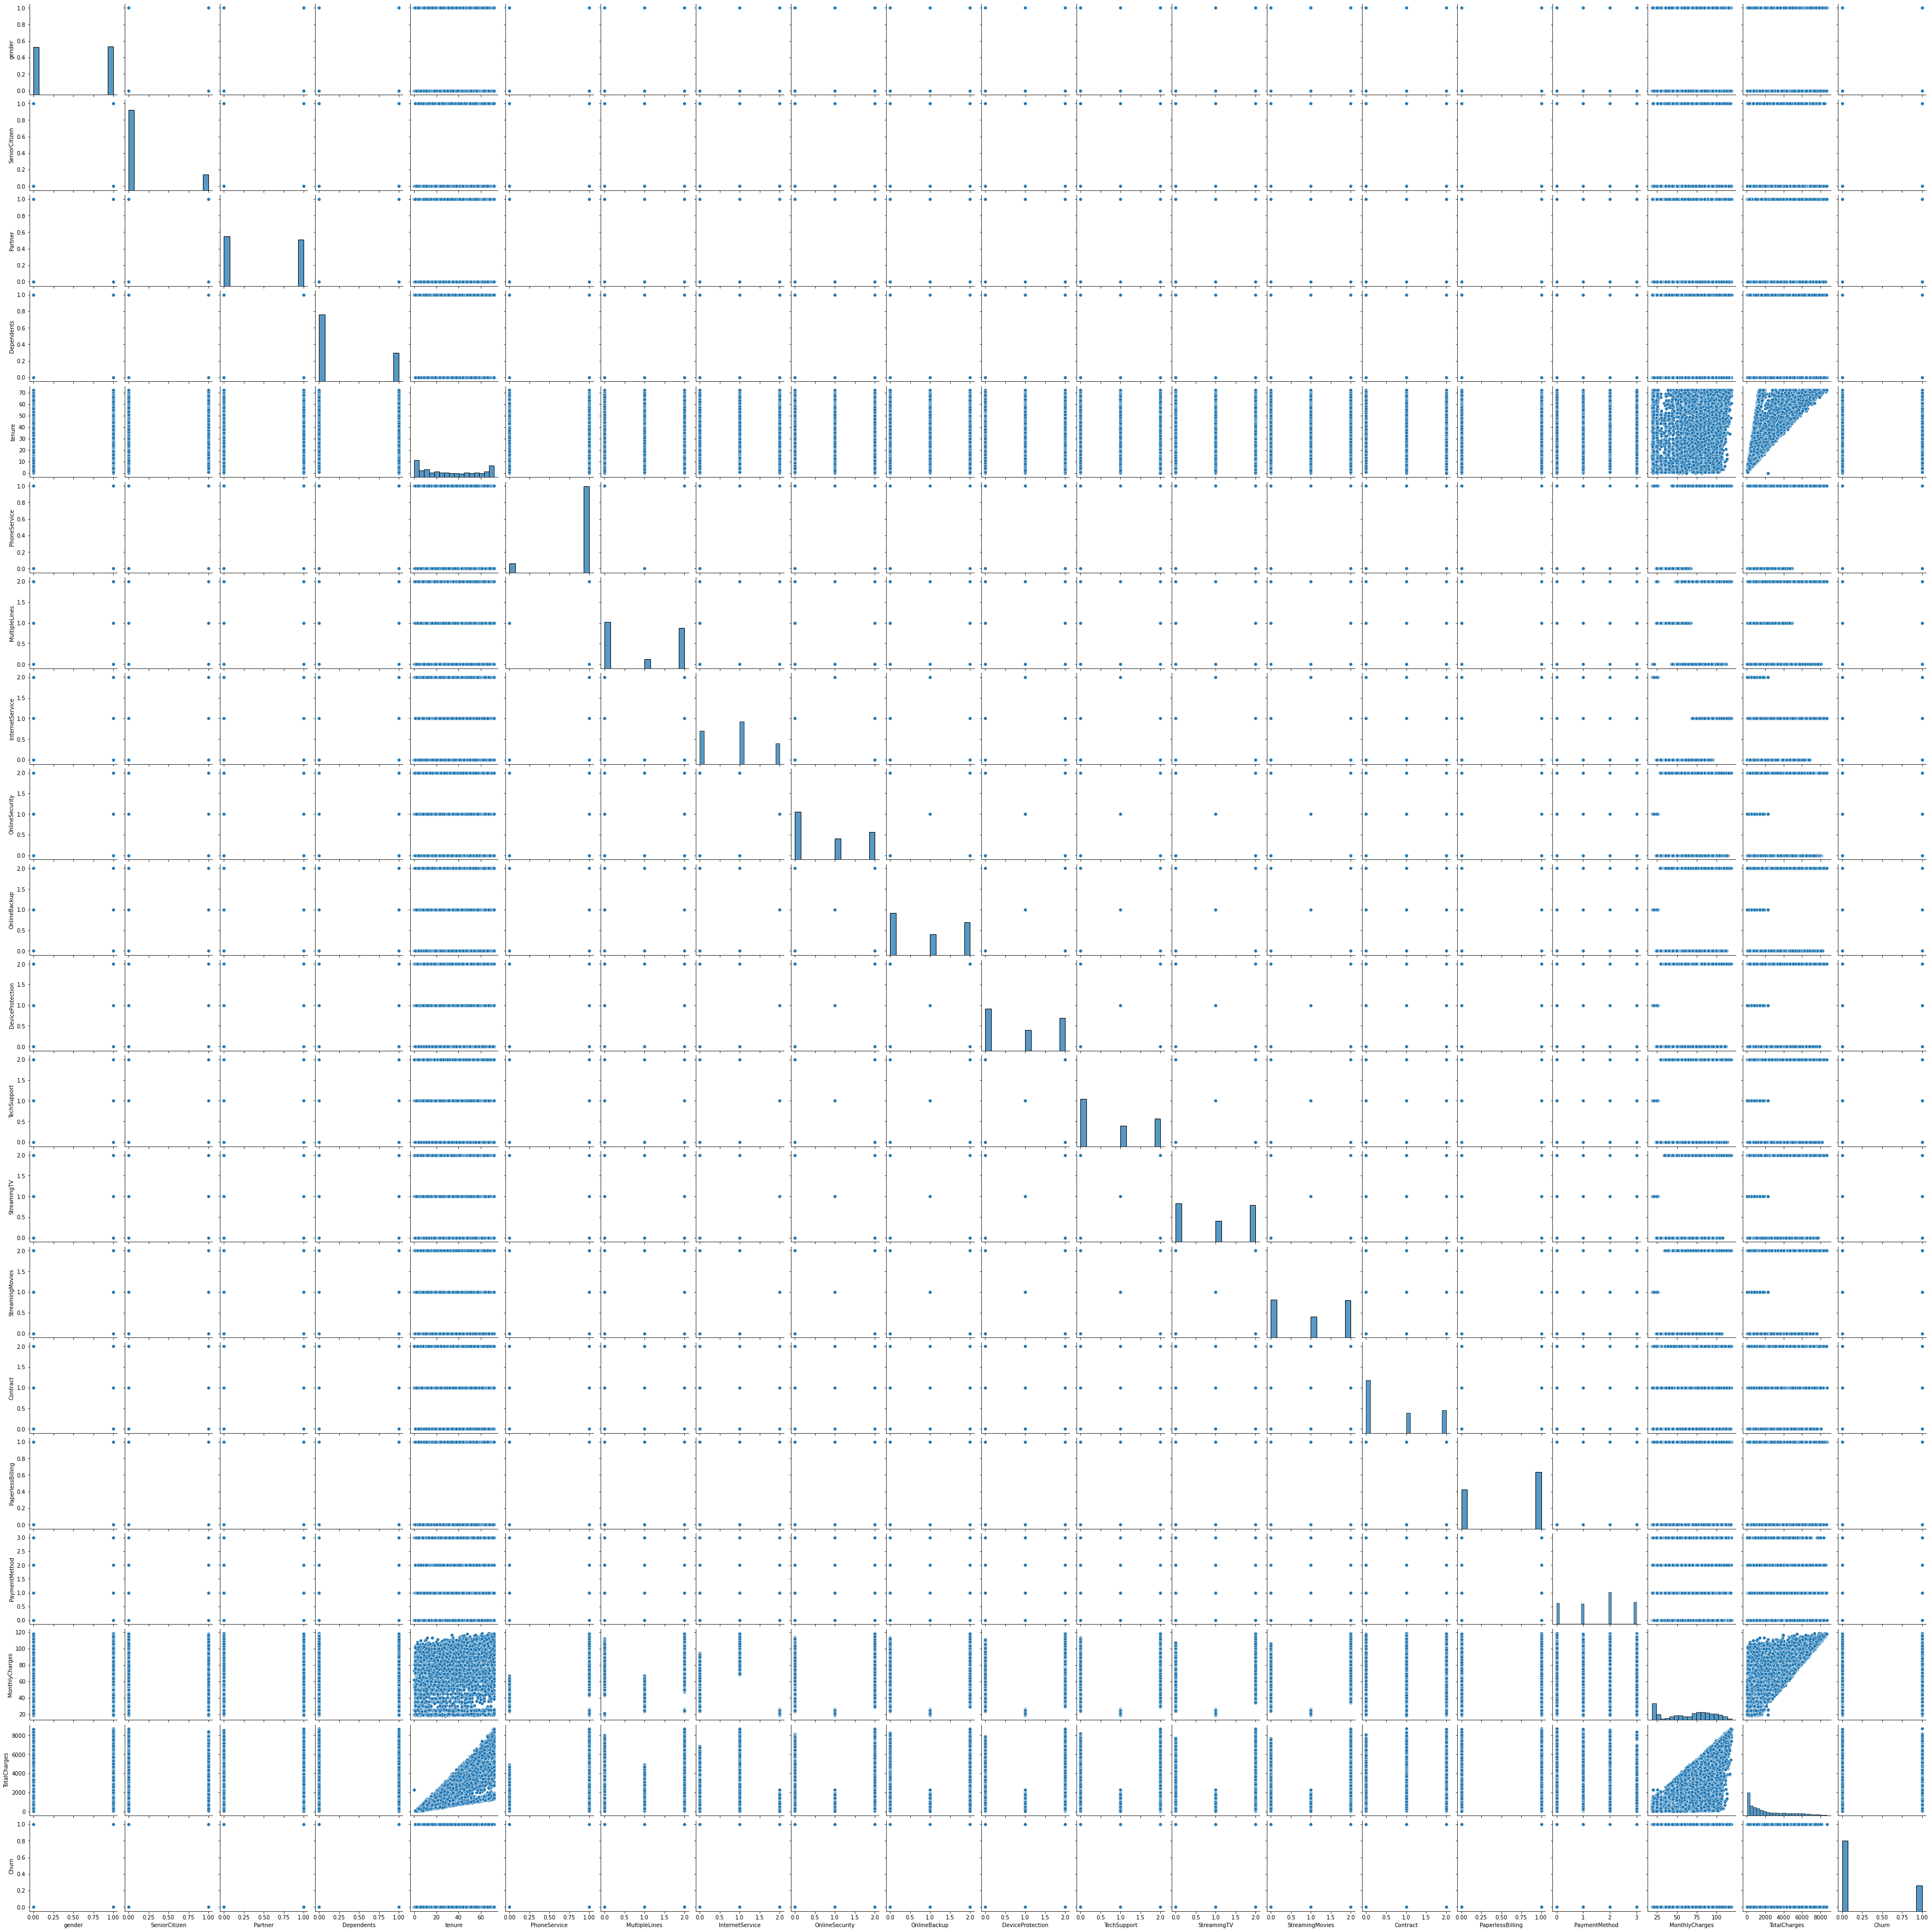

In [82]:
#Multivariate Analysis
sns.pairplot(df)

# Splitting the data into X and Y 


In [97]:
X = df.drop(['Churn'],axis=1)
Y = df['Churn']

In [98]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [99]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

# Feature Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
print(X_scaled)
X_scaled.shape[1]

        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1     0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2     0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3     0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4    -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
...        ...            ...       ...         ...       ...           ...   
7038  0.990532      -0.439916  1.034530    1.529024 -0.340876      0.327438   
7039 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
7040 -1.009559      -0.439916  1.034530    1.529024 -0.870241     -3.054010   
7041  0.990532       2.273159  1.034530   -0.654012 -1.155283      0.327438   
7042  0.990532      -0.439916 -0.966622   -0.654012  1.369379      0.327438   

      MultipleLines  InternetService  OnlineSecurit

19

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# VIF

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.001938,gender
1,1.149759,SeniorCitizen
2,1.461052,Partner
3,1.382351,Dependents
4,7.213411,tenure
5,1.622493,PhoneService
6,1.394323,MultipleLines
7,1.826632,InternetService
8,1.268868,OnlineSecurity
9,1.218713,OnlineBackup


Since above values have vif greater than 10 , I conclude that there is no multicollinearity between the variables.

Check for skewness

In [105]:
X_scaled.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

# Power Transformer

In [109]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_scaled = pd.DataFrame(pt.fit_transform(X),columns=X.columns)
print(X_scaled)
X_scaled.shape[1]

        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.009559      -0.439916  1.034530   -0.654012 -1.644343     -3.054010   
1     0.990532      -0.439916 -0.966622   -0.654012  0.297205      0.327438   
2     0.990532      -0.439916 -0.966622   -0.654012 -1.495444      0.327438   
3     0.990532      -0.439916 -0.966622   -0.654012  0.646327     -3.054010   
4    -1.009559      -0.439916 -0.966622   -0.654012 -1.495444      0.327438   
...        ...            ...       ...         ...       ...           ...   
7038  0.990532      -0.439916  1.034530    1.529024 -0.078084      0.327438   
7039 -1.009559      -0.439916  1.034530    1.529024  1.342198      0.327438   
7040 -1.009559      -0.439916  1.034530    1.529024 -0.725121     -3.054010   
7041  0.990532       2.273159  1.034530   -0.654012 -1.265130      0.327438   
7042  0.990532      -0.439916 -0.966622   -0.654012  1.201896      0.327438   

      MultipleLines  InternetService  OnlineSecurit

19

I have used power transformation method to tune the skewness of our data.

# Converting an Imbalanced Dataset into a Balanced Dataset

0    5174
1    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

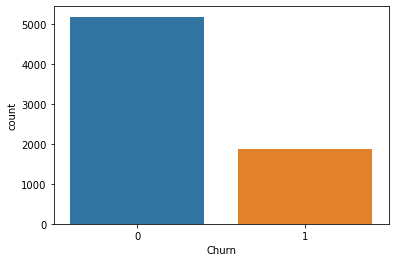

In [116]:
print(Y.value_counts())
sns.countplot(Y)

Listing the values of our label column to count the number of rows occupied by each category. This indicates a huge class imbalance that we will have to fix by using the oversampling method.

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [126]:
from imblearn.over_sampling import SMOTE

# adding samples to make all the categorical quality values same
oversample = SMOTE()
X_scaled, Y = oversample.fit_resample(X_scaled, Y)

In [127]:
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

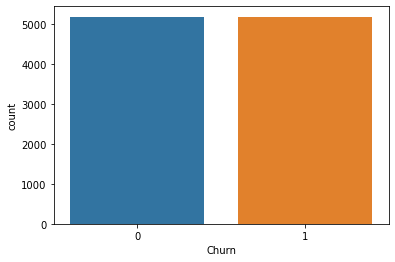

In [128]:
sns.countplot(Y)

# Model Building

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit

# 1]Logistic Regression

In [130]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test, y_lr)
    
    if accuracy_lr>maxAccuracy:
        maxAccuracy=accuracy_lr
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7896940418679549  on Random State 74


In [142]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=74)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  78.96940418679549
---------------------------------------------
[0.77246377 0.7589372  0.77826087 0.78492025 0.79507008]
Cross Validation Score :  77.79304338486467
---------------------------------------------
[[1223  347]
 [ 306 1229]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1570
           1       0.78      0.80      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [133]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.7468599  0.73816425 0.7410628  0.77283712 0.72498792]
--------------------------------------------------
K-Fold Cross Validation Score :  74.4782398554227


In [134]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
s1 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(s1)
print('--'*50)
print("Stratified Shuffle Split : ",s1.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.79227053 0.77971014 0.79516908 0.76908213 0.77584541]
----------------------------------------------------------------------------------------------------
Stratified Shuffle Split :  78.24154589371982


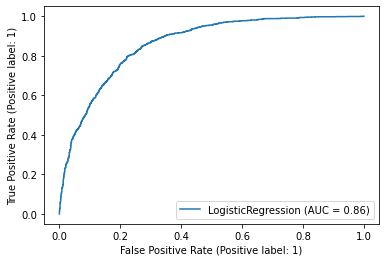

In [137]:
#Roc Curve
plot_roc_curve(lr,x_test,y_test)

In [140]:
print(lr.score(x_train,y_train)*100)#Training Score
print(lr.score(x_test,y_test)*100)#Testing Score

77.63357724699709
78.32528180354267


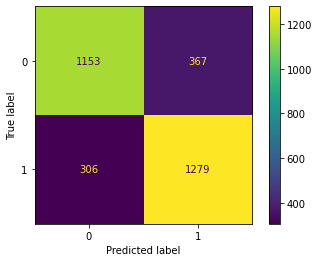

In [141]:
#Plot Confusion Matrix
plot_confusion_matrix(lr,x_test,y_test)

# 2]Decision Tree

In [251]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_dt)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8025764895330113  on Random State 90


In [253]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=90)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))

Accuracy score :  80.06441223832527
---------------------------------------------
[0.68888889 0.7178744  0.82608696 0.8279362  0.84485259]
Cross Validation Score :  78.11278056798892
---------------------------------------------
[[1260  322]
 [ 297 1226]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1582
           1       0.79      0.80      0.80      1523

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [254]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.74541063 0.73043478 0.73478261 0.81730304 0.85210246]
--------------------------------------------------
K-Fold Cross Validation Score :  77.6006705846368


In [255]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
d1 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(d1)
print('--'*30)
print("Stratified Shuffle Split : ",d1.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.7826087  0.77971014 0.78937198 0.79516908 0.79033816]
------------------------------------------------------------
Stratified Shuffle Split :  78.743961352657


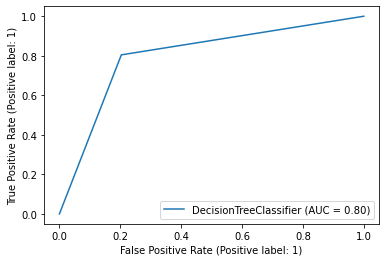

In [256]:
#Roc Curve
plot_roc_curve(dt,x_test,y_test)

In [258]:
print(dt.score(x_train,y_train)*100)#Training Score
print(dt.score(x_test,y_test)*100)#Testing Score

99.87574209581666
80.06441223832527


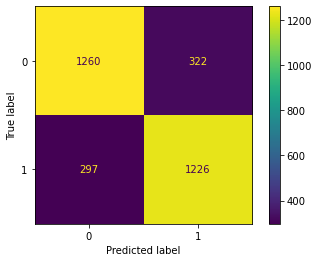

In [259]:
#Plot Confusion Matrix
plot_confusion_matrix(dt,x_test,y_test)

# KNN

In [154]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_knn)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8009661835748793  on Random State 81


In [156]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=81)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))

Accuracy score :  80.09661835748793
---------------------------------------------
[0.77777778 0.76908213 0.80531401 0.80425326 0.8240696 ]
Cross Validation Score :  79.60993548658246
---------------------------------------------
[[1077  438]
 [ 180 1410]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1515
           1       0.76      0.89      0.82      1590

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105



In [157]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.71352657 0.7        0.69951691 0.83760271 0.88883519]
--------------------------------------------------
K-Fold Cross Validation Score :  76.78962741925315


In [159]:
#Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print("Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.79033816 0.80193237 0.80289855 0.79806763 0.80386473]
--------------------------------------------------
Shuffle Split :  79.94202898550725


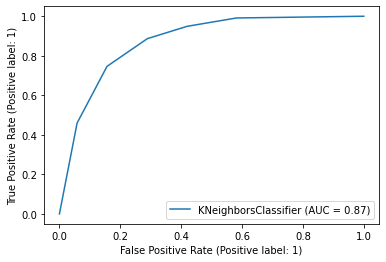

In [160]:
#Plot Roc Curve
plot_roc_curve(knn,x_test,y_test)

In [163]:
print(knn.score(x_train,y_train)*100)#Training Score
print(knn.score(x_test,y_test)*100)#Testing Score

84.57821344746652
80.09661835748793


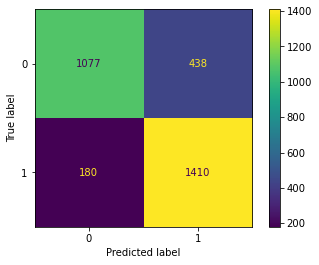

In [162]:
#Plot Confusion Matrix
plot_confusion_matrix(knn,x_test,y_test)

# Support Vector Classifier

In [164]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    y_svc = svc.predict(x_test)
    accuracy = accuracy_score(y_test, y_svc)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8238325281803542  on Random State 79


In [165]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=79)

#training our model
svc=SVC()
svc.fit(x_train, y_train)

#Predicting y_test
y_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_svc)

#Accuracy Score
print("Accuracy score : ", accuracy_svc*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_svc = cross_val_score(svc,X_scaled,Y,cv=5)
print(cross_val_svc)
print("Cross Validation Score : ",cross_val_svc.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_svc))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_svc))

Accuracy score :  82.38325281803543
---------------------------------------------
[0.78502415 0.77149758 0.81256039 0.82841953 0.84533591]
Cross Validation Score :  80.85675126026484
---------------------------------------------
[[1225  323]
 [ 224 1333]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1548
           1       0.80      0.86      0.83      1557

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



In [172]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
s1 = cross_val_score(svc,X_scaled,Y,cv=K_fold)
print(s1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , s1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.76183575 0.74927536 0.74975845 0.81875302 0.7897535 ]
--------------------------------------------------
K-Fold Cross Validation Score :  0.7738752180217287


In [171]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
s2 = cross_val_score(svc,X_scaled,Y,cv=Stratified_Shuffle)
print(s2)
print("--------------------------------------------------")
print("Shuffle Split : ",s2.mean())

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.80772947 0.81256039 0.79516908 0.80966184 0.80966184]
--------------------------------------------------
Shuffle Split :  0.8069565217391304


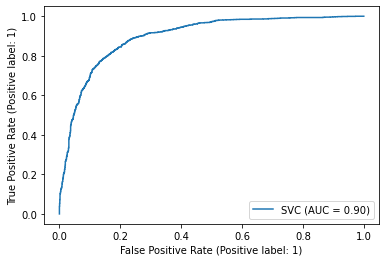

In [166]:
#Plot Roc Curve
plot_roc_curve(svc,x_test,y_test)

In [167]:
print(svc.score(x_train,y_train)*100)#Training Score
print(svc.score(x_test,y_test)*100)#Testing Score

83.63937594919231
82.38325281803543


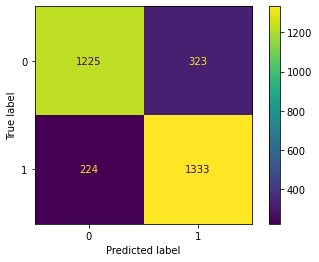

In [168]:
#plot confusion matrix
plot_confusion_matrix(svc,x_test,y_test)

# 5]Random Forest

In [169]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_rf)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8682769726247987  on Random State 57


In [174]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=57)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))

Accuracy score :  86.40901771336554
---------------------------------------------
[0.7647343  0.78599034 0.89227053 0.89995167 0.9139681 ]
Cross Validation Score :  85.13829874171985
---------------------------------------------
[[1303  230]
 [ 192 1380]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1533
           1       0.86      0.88      0.87      1572

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



In [175]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.80966184 0.79227053 0.78985507 0.89705172 0.94103432]
--------------------------------------------------
K-Fold Cross Validation Score :  0.8459746943025989


In [177]:
# Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print("Shuffle Split : ",r2.mean())

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.83381643 0.8763285  0.86763285 0.86086957 0.86956522]
--------------------------------------------------
Shuffle Split :  0.8616425120772947


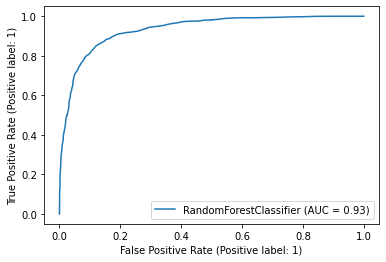

In [178]:
#Plot Roc curve
plot_roc_curve(rf,x_test,y_test)

In [179]:
print(rf.score(x_train,y_train)*100)#Training Score
print(rf.score(x_test,y_test)*100)#Testing Score

99.8619356620185
86.40901771336554


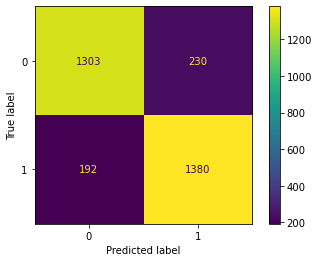

In [180]:
#Plot Confusion Matrix
plot_confusion_matrix(rf,x_test,y_test)

# 6]Ada Boost Classfier

In [183]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    accuracy_ad = accuracy_score(y_test, y_ad)
    
    if accuracy_ad>maxAccuracy:
        maxAccuracy=accuracy_ad
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8344605475040258  on Random State 60


In [184]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=60)

#training our model
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_ad)

#Accuracy Score
print("Accuracy score : ", accuracy_ad*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_ad = cross_val_score(ad,X_scaled,Y,cv=5)
print(cross_val_ad)
print("Cross Validation Score : ",cross_val_ad.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_ad))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_ad))

Accuracy score :  83.44605475040258
---------------------------------------------
[0.7647343  0.77487923 0.8294686  0.84678589 0.85935234]
Cross Validation Score :  81.50440713266696
---------------------------------------------
[[1240  320]
 [ 194 1351]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1560
           1       0.81      0.87      0.84      1545

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



In [185]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
a1 = cross_val_score(ad,X_scaled,Y,cv=K_fold)
print(a1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , a1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.76425121 0.75845411 0.74927536 0.84775254 0.85790237]
--------------------------------------------------
K-Fold Cross Validation Score :  79.55271164160148


In [186]:
# Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
a2 = cross_val_score(ad,X_scaled,Y,cv=Stratified_Shuffle)
print(a2)
print("--------------------------------------------------")
print("Shuffle Split : ",a2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.81642512 0.79323671 0.83961353 0.81932367 0.82415459]
--------------------------------------------------
Shuffle Split :  81.85507246376812


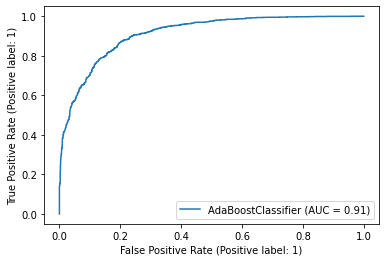

In [187]:
#plot roc curve
plot_roc_curve(ad,x_test,y_test)

In [188]:
print(ad.score(x_train,y_train)*100)#Training Score
print(ad.score(x_test,y_test)*100)#Testing Score

81.78931382024022
83.44605475040258


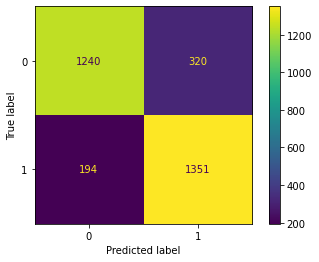

In [189]:
#Plot confusion matrix
plot_confusion_matrix(ad,x_test,y_test)

# 7]Gradient Boost

In [190]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy = accuracy_score(y_test, y_gb)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.855072463768116  on Random State 56


In [191]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=56)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))

Accuracy score :  85.5072463768116
---------------------------------------------
[0.74927536 0.77777778 0.86908213 0.88496858 0.89028516]
Cross Validation Score :  83.42778022942774
---------------------------------------------
[[1299  258]
 [ 192 1356]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1557
           1       0.84      0.88      0.86      1548

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



In [192]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.7763285  0.78309179 0.78019324 0.88206863 0.91445143]
--------------------------------------------------
K-Fold Cross Validation Score :  82.72267169138162


In [194]:
#Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print("Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.83188406 0.84154589 0.82028986 0.86086957 0.86763285]
--------------------------------------------------
Shuffle Split :  84.44444444444444


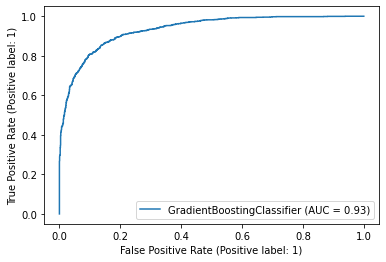

In [195]:
#Plot roc curve
plot_roc_curve(gb,x_test,y_test)

In [196]:
print(gb.score(x_train,y_train)*100)#Training Score
print(gb.score(x_test,y_test)*100)#Testing Score

85.37898660775922
85.5072463768116


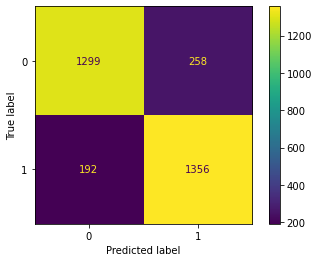

In [197]:
#Plot confusion matrix
plot_confusion_matrix(gb,x_test,y_test)

# HyperParameter Tuning

Based on the confusion matrix I have taken Decision Tree Classifier for tuning my hyperparameters

I will use Grid Search to tune my hyperparameters

In [198]:
from sklearn.model_selection import GridSearchCV

After comparing all the classification models I have selected Decision Tree Classifier as my best model considering the confusion matrix (being high) with the cross validation score against it and have listed down the chosen parameters above.

In [202]:
#Choosing Decision Tree Classifier

params = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'min_samples_split' : [2,3,4],    
}

In [203]:
gs_decision_tree = GridSearchCV(dt,param_grid=params,cv=5)

gs_decision_tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [204]:
#Training the model 
gs_decision_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [205]:
#Training Score
gs_decision_tree.score(x_train,y_train)

0.7971834875051774

In [210]:
#Test Score
gs_decision_tree.score(x_test,y_test)

0.7996779388083736

In [209]:
#Best Params
gs_decision_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [211]:
#Best score
gs_decision_tree.best_score_

0.7846202753661318

In [216]:
#Implementing best accuracy
final_model = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,splitter='best')
final_model.fit(x_train,y_train)
y_final_model = final_model.predict(x_test)
print(y_final_model)
print("Accuracy : ",accuracy_score(y_test,y_final_model)*100)
print("Classification Report : ",classification_report(y_test,y_final_model))

[1 0 1 ... 0 0 1]
Accuracy :  79.96779388083736
Classification Report :                precision    recall  f1-score   support

           0       0.83      0.75      0.79      1557
           1       0.77      0.84      0.81      1548

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



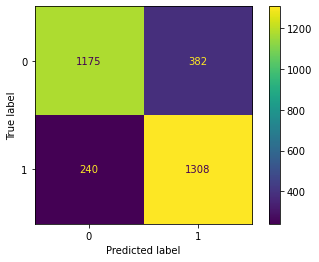

In [214]:
#Plot Cconfusion Matrix
plot_confusion_matrix(final_model,x_test,y_test)

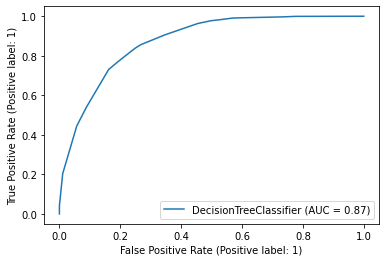

In [263]:
#Plot Roc Curve
plot_roc_curve(final_model,x_test,y_test)

In [223]:
#Cross Validation Score
cross_val_score(final_model,x_test,y_test,cv=5).mean()*100

79.64573268921094

In [219]:
#K fold Cross Validation Score
K = KFold(n_splits=5)
print(K)

KFold(n_splits=5, random_state=None, shuffle=False)


In [222]:
cross_val_score(final_model,x_test,y_test,cv=K).mean()*100

79.61352657004831

In [226]:
#Stratified Shuffle Split Cross Validation Score
Stratified_Shuffle_final_model = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle_final_model)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)


In [227]:
cross_val_score(final_model,x_test,y_test,cv=Stratified_Shuffle_final_model).mean()*100

80.70739549839227

Conclusion : Based on the parameters I have given I see that the score for my hyperparametrized model is giving almost around 79-80% accuracy which is same than the model which I created before doing hyperparameter tuning.The Roc curve score is giving me around 87% which is comparatively more than the roc curve score for the decision tree model.I can infer that the default parameters used in my decision tree i.e after doing hyperparameter tuning is the best model.

I also see the accuracy score for Random Forest and Gradient Boost is also very high.But I choosed Decision Tree because I wanted to increase the accuracy score for it.

# Saving my best model

In [260]:
import pickle

In [261]:
filename = "Telecom_churn.pkl"

In [262]:
pickle.dump(final_model,open(filename,'wb'))

Finally I am saving my best classification model using the pickle library.